In [114]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import util
from skimage import filters
from skimage import io
from skimage import exposure
from skimage.io import imsave
from skimage.morphology import reconstruction, skeletonize

from skimage import restoration

import cv2

import pytesseract

In [115]:
def get_text(binary_image):
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    im2 = binary_image.copy()
    text = pytesseract.image_to_string(im2)
    return text

In [116]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()

In [117]:
def get_contours(binary_image):
    # contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours, hierarchy = cv2.findContours(binary_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    contour_list = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # Cropping the text block for giving input to OCR
        cropped = binary_image[y:y + h, x:x + w]
        # Open the file in append mode
        # file = open("recognized.txt", "a")
        
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped)
        
        # Appending the text into file
        contour_list.append(text)

    # Draw contours
    h, w = binary_image.shape[:2]
    vis = np.zeros((h, w, 3), np.uint8)
    cv2.drawContours(vis, contours, -1, (128,255,255), 1)
    vis = np.asarray(vis,dtype=np.uint8)

    show(vis)
    return vis, contour_list

In [118]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [119]:
def return_text(image):  
    img = io.imread(image, as_gray=True)

    img_inv = util.invert(util.img_as_float(img))

    # blurr the image slightly to remove noise
    blurred = filters.gaussian(img_inv, sigma=1.0)

    # remove background
    background = restoration.rolling_ball(blurred)  # kernel_size=(50, 50), intensity_vertex=0.1
    normalized = blurred - background

    # re-normalize intensity
    normalized = exposure.rescale_intensity(normalized)

    # binarize
    binary = normalized > 0.35

    # binary = np.asarray(binary,dtype=np.uint8)
    # kernel = np.ones((10,10),np.uint8)
    # dilation = cv2.dilate(binary,kernel,iterations = 1)

    seed = np.copy(binary)
    seed[1:-1, 1:-1] = 1
    mask = binary
    filled = reconstruction(seed, mask, method='erosion')

    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(filled, cv2.MORPH_CLOSE, kernel)

    masked_binary = binary - closing

    plt.imshow(binary, cmap="gray")
    plt.gca().axis("off")
    plt.show()

    plt.imshow(masked_binary, cmap="gray")
    plt.gca().axis("off")
    plt.show()

    masked_binary = np.asarray(masked_binary,dtype=np.uint8)
    imsave("test.png", masked_binary)

    # contours, text= get_contours(filled)
    # imsave("contours.png", contours)

    print("text:",get_text(masked_binary))
    
    return get_text(masked_binary)

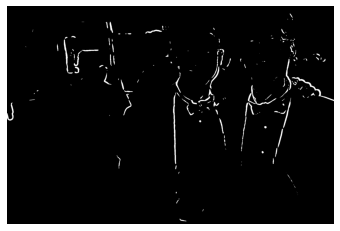

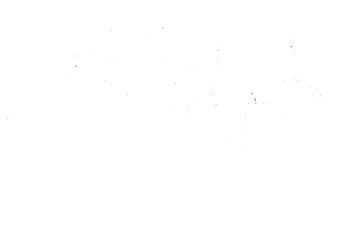

<ipython-input-119-420034acbd33>:42: UserWarning: test.png is a low contrast image
  imsave("test.png", masked_binary)


text: 


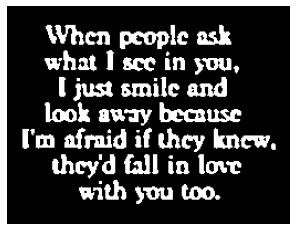

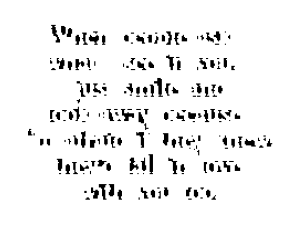

text: Wytg) cant. out

svbastee Tole umes
ners Bl Ye ae
wate kai tee,




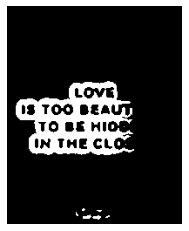

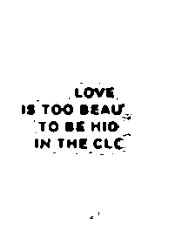

text: . LOVE,
1s TOO Beau,

TORE HIO.

IN THE CLE



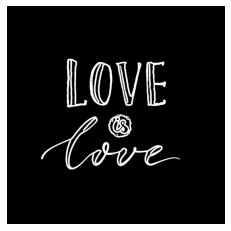

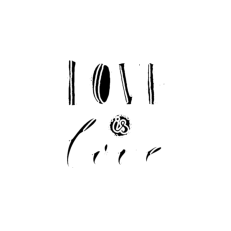

text: } ut



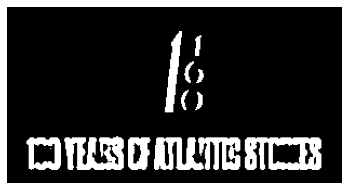

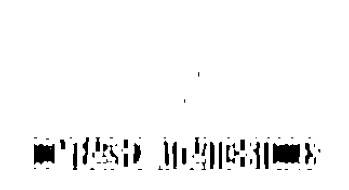

text: [Me esta Doo



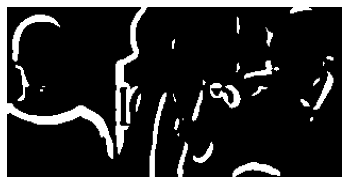

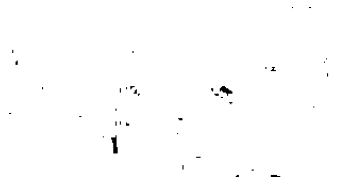

text: 


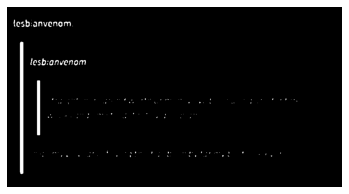

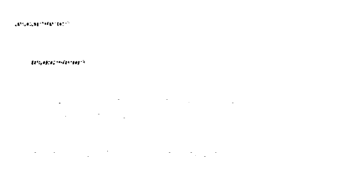

text: 


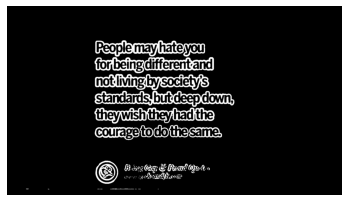

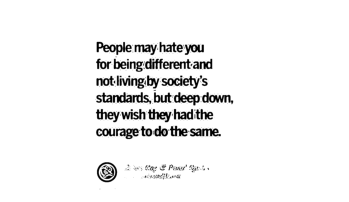

text: People may hate you

for being:different‘and

not livingiby society's
standards, but: deep:down,
they wish they hadithe
courage todo the same.

Bes, at oe epg yt Hop.
-< ab aes Cae & Pie’ Qed»
I tai



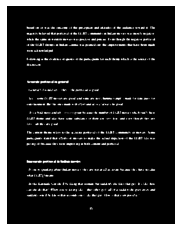

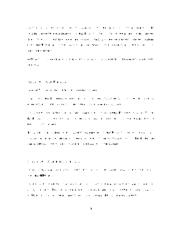

text: veh om ee
Mae co errs eno
ee
bn ros pambee
Pr ce ee, eer om tet
bok eee a or ers
fae as ae
ve erdtte e
ae
es ara. ees




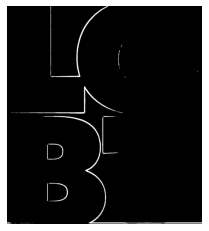

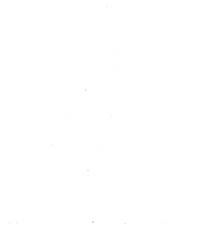

text: 


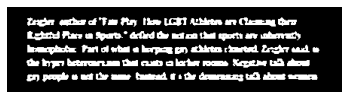

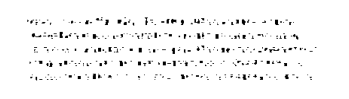

text: 


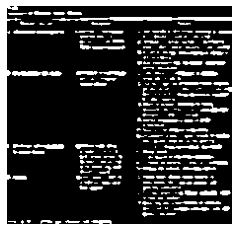

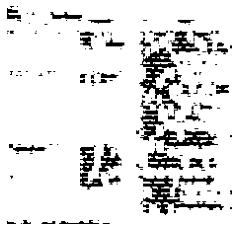

text: 


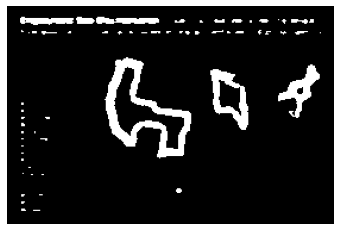

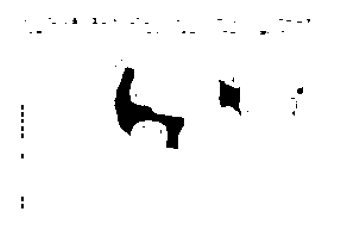

text: 


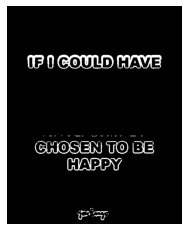

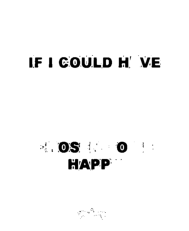

text: IF | GOULD H' VE



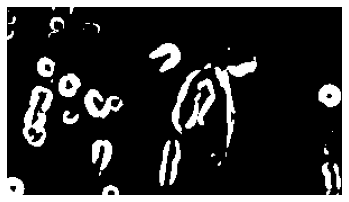

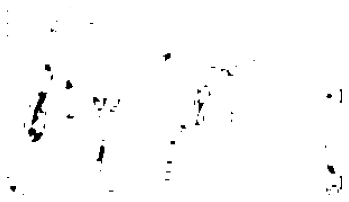

text: 


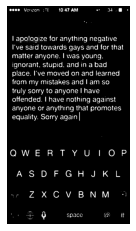

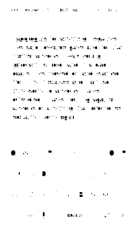

text: Mh

we




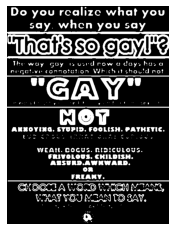

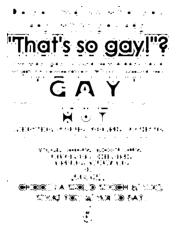

text: 


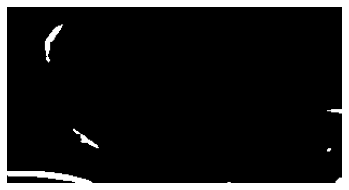

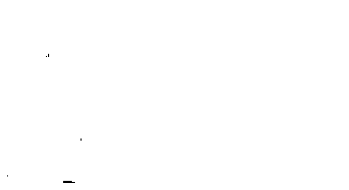

text: 


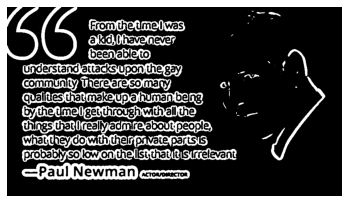

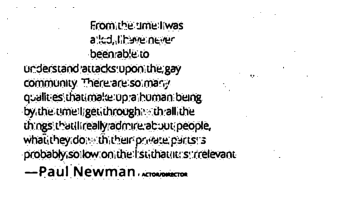

text: fromthe: ume:liwas

ad have: never

‘beenrable.to
urderstandattacks‘upon the gay
community There-are:soimasiy
qualitiesithaumake:up-aihumani being
‘by. the. umelligeuthroughith-all. the
thags'thutilireallyradmrwe-about people,
whattheyidomthitheiriprvate: puints's
‘probably:sollow onithe'lsuithauitrserrélevant
—Paul Newman. scosive




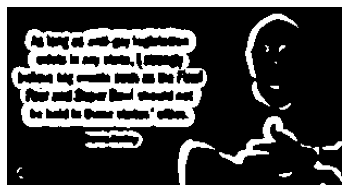

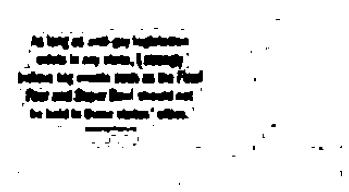

text: 


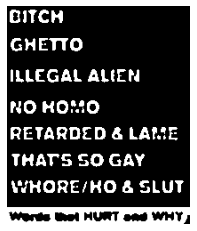

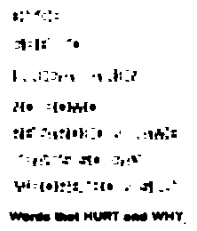

text: Wwisqeyeis "rte 6 ay.

Werds tet HURT sas WHY



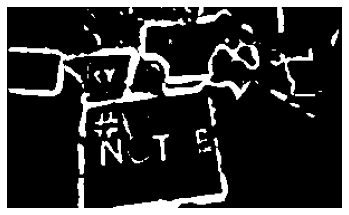

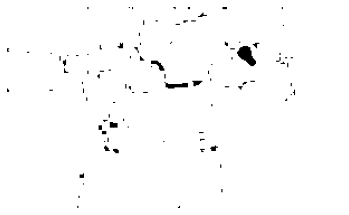

text: 


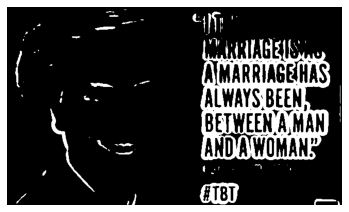

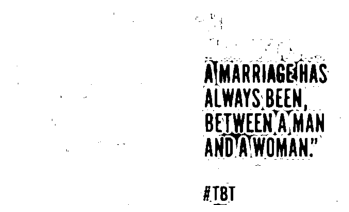

text: itwAnindetias
ALWAYS BEEN,

BETWEEN MAN
AND'AN WOHAN””

ATBT



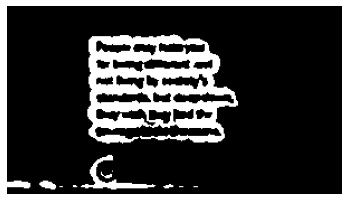

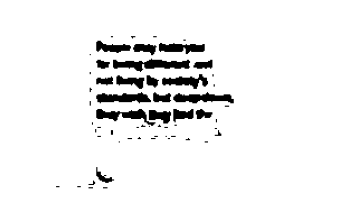

text: 


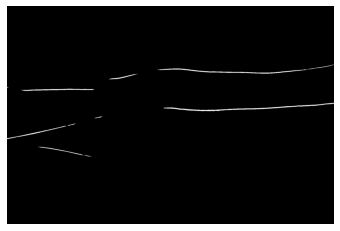

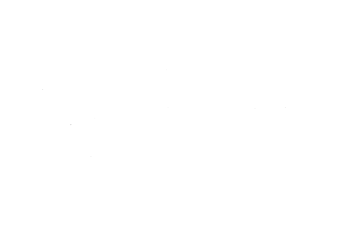

text: 


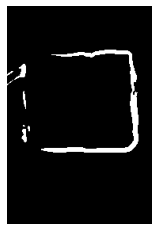

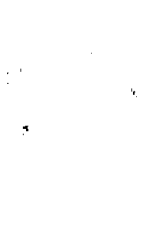

text: 


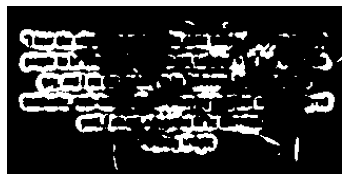

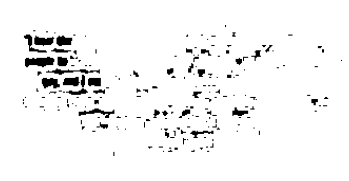

text: 


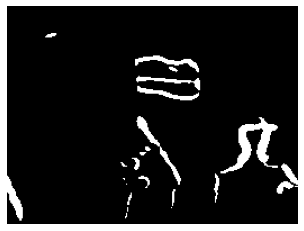

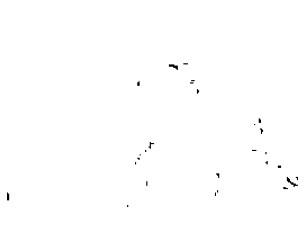

text: 


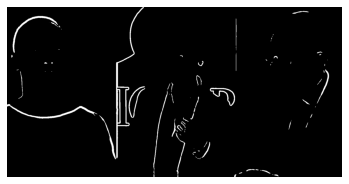

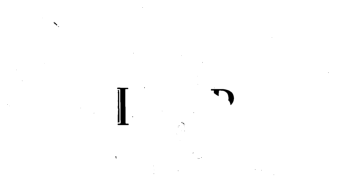

text: 


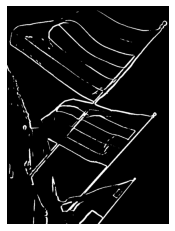

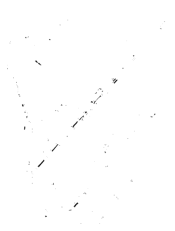

text: ”



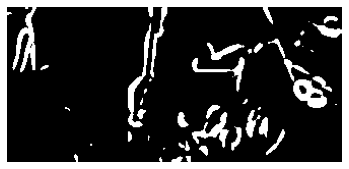

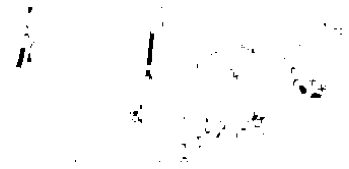

text: K



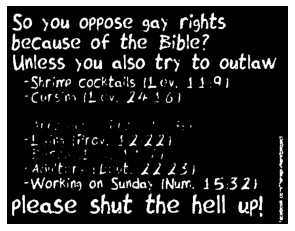

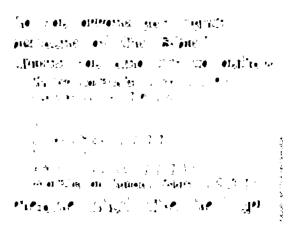

text: 


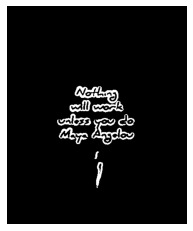

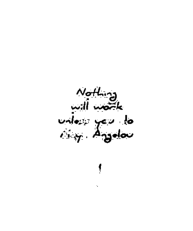

text: 


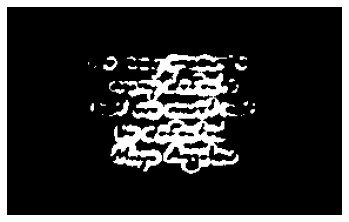

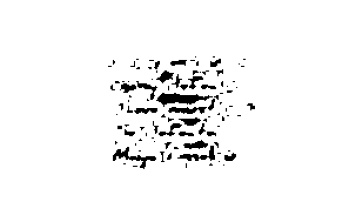

text: 


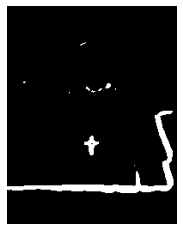

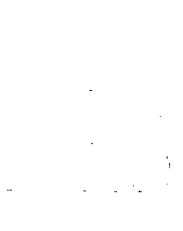

text: 


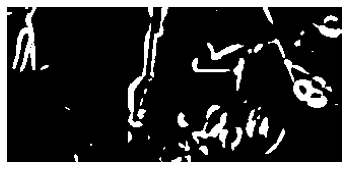

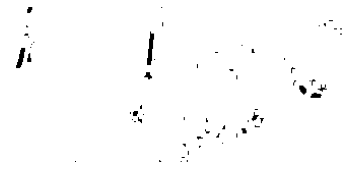

text: kK



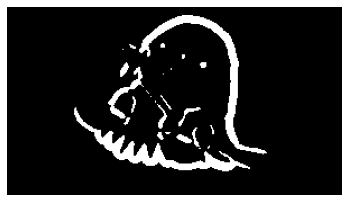

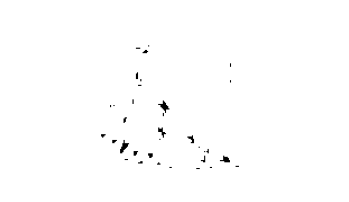

text: 


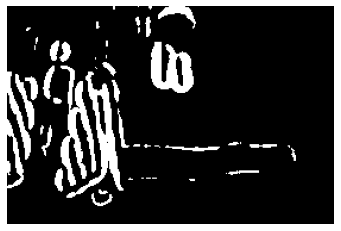

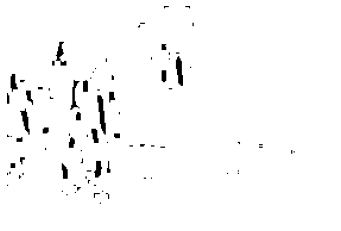

text: 


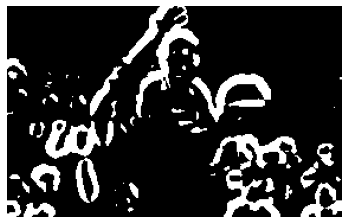

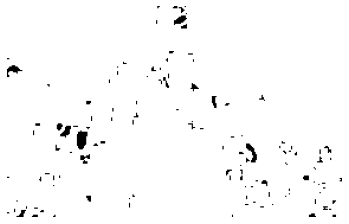

text: 


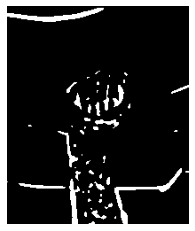

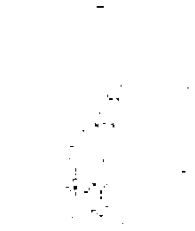

text: 


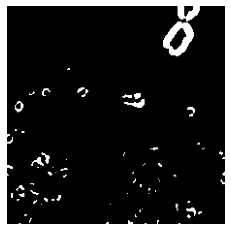

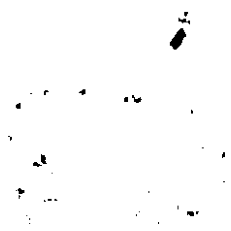

text: *:.



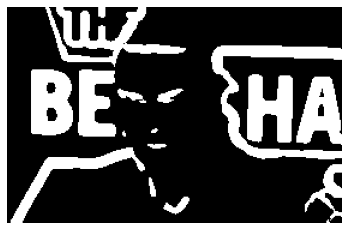

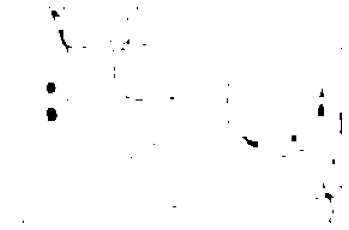

text: 


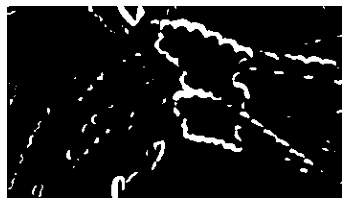

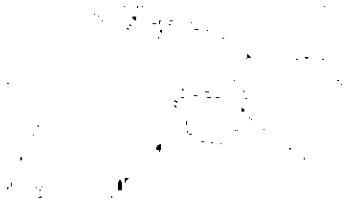

text: 


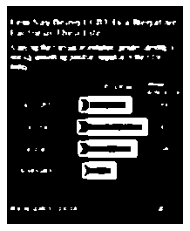

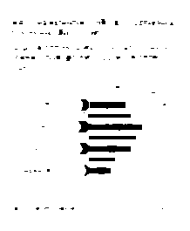

text: 


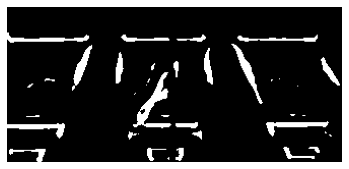

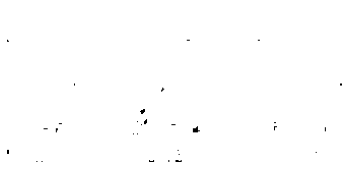

text: 


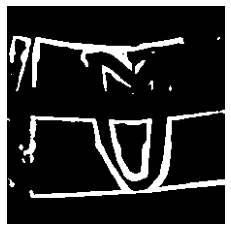

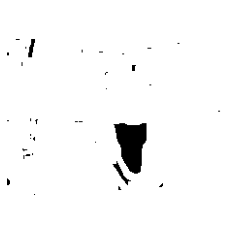

text: 


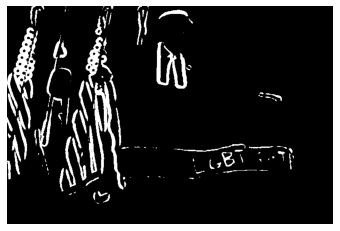

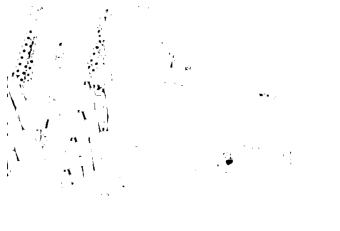

text: 


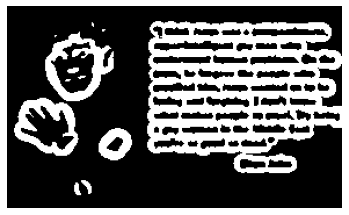

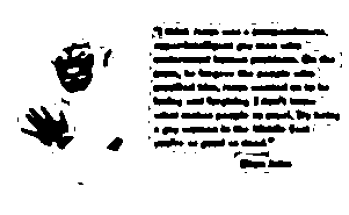

text: 


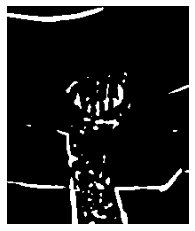

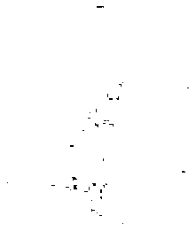

text: 


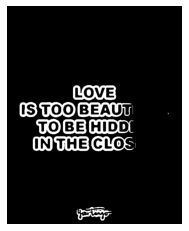

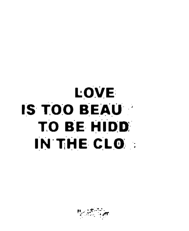

text: LOVE
IS TOO BEAU -
TO BE HIDD
IN THE CLO :



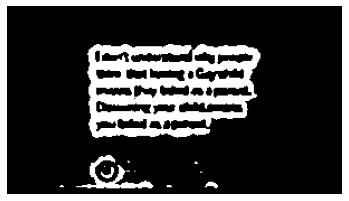

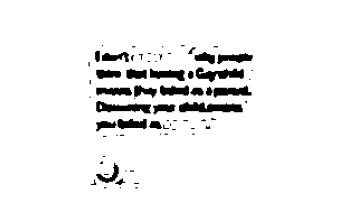

text: 


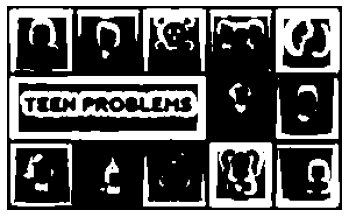

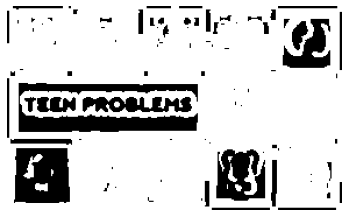

text: 


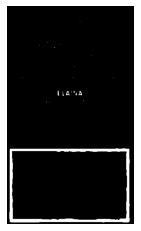

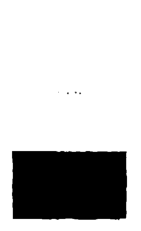

text: 


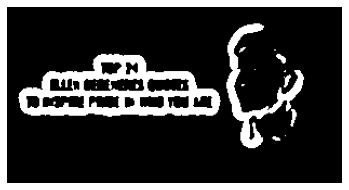

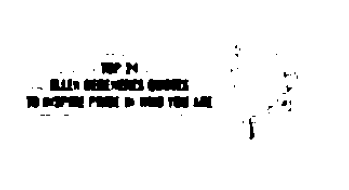

text: 


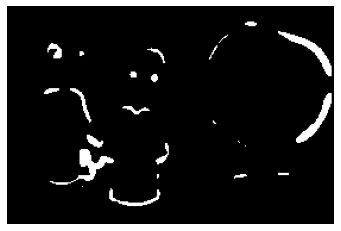

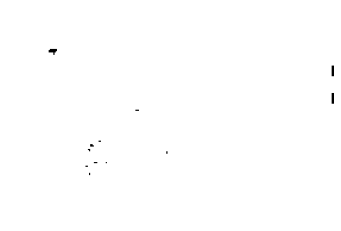

text: 


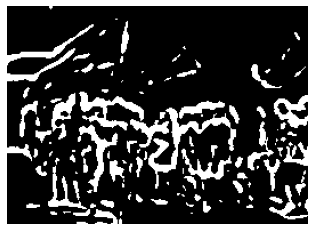

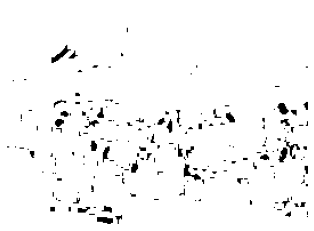

text: 


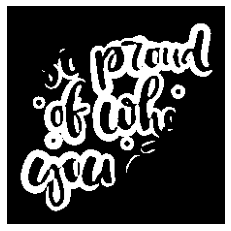

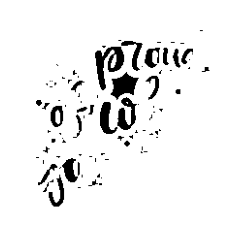

text: (ot
as




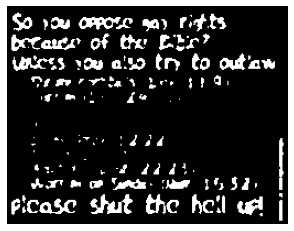

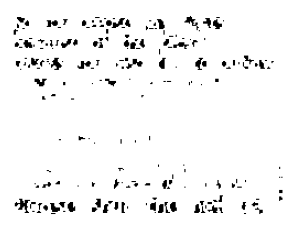

text: 


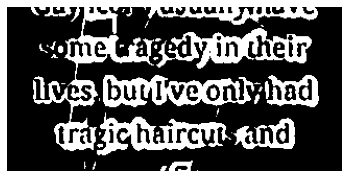

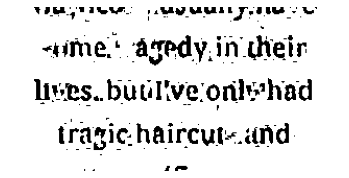

text: «me agedy div dh in
lives. buulve‘onlwhad
tragic haircut-.and




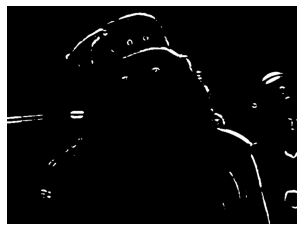

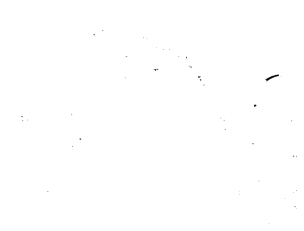

text: 


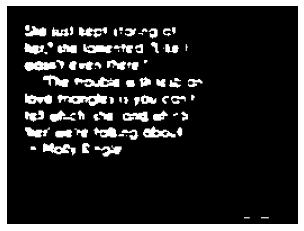

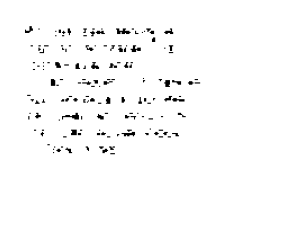

text: 


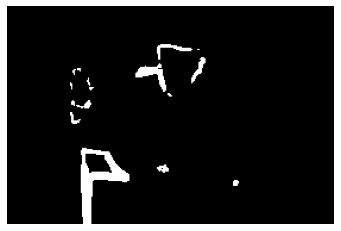

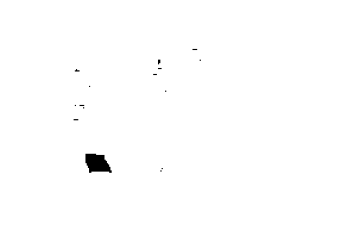

text: 


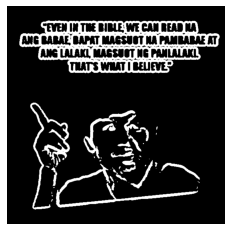

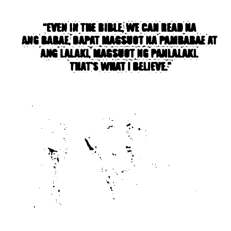

text: “EVEN IM TE BIBLE! WE CAM REAB MA
ANG BABAE! BAPAT | MAGSUGT NA PAMBABAE ‘aT

‘ANG LALAKL MAGSSOT NG PANLALAKL
“THAT'S WHAT | BELIEVE”

- ne
bat ‘ \:. bo



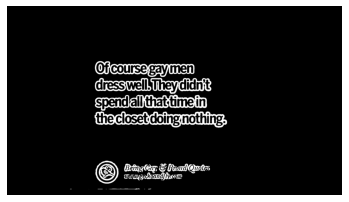

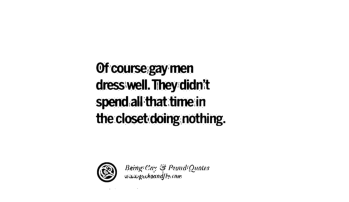

text: Of coursegay'men
dress:well. They:didn't
spend.all‘that timeiin
the:closetdoing nothing.

auinegeukoand ly: com

Bain: Cax SF Prond'Quoles



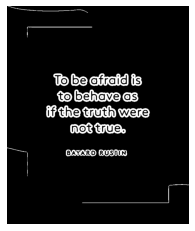

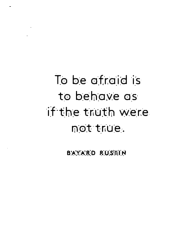

text: To be afraid is
to behave as
ifthe truth were
not true.

BAYARD RUSITICN



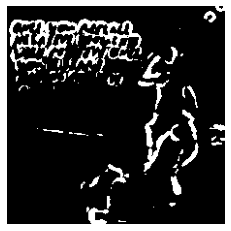

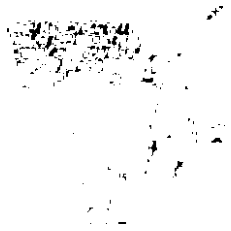

text: 


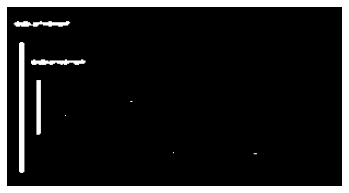

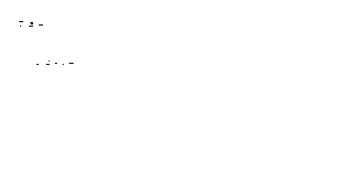

text: 


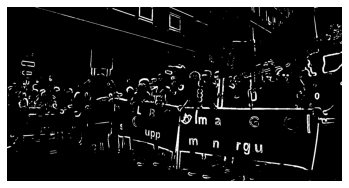

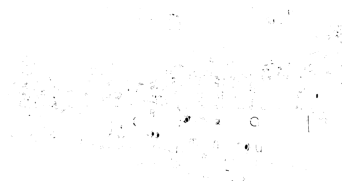

text: 


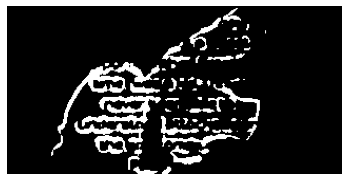

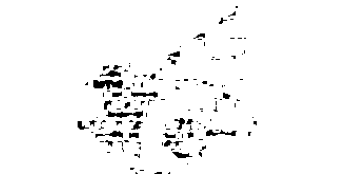

text: 


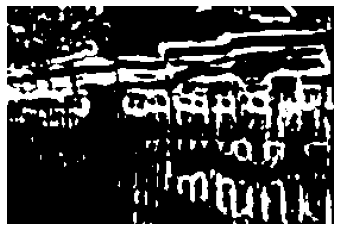

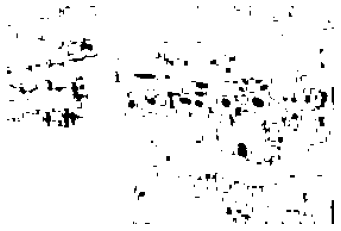

text: 


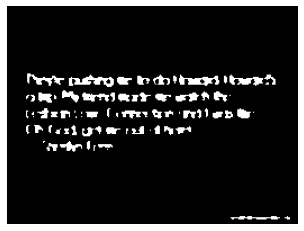

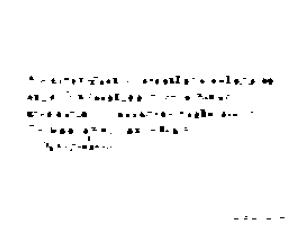

text: Sree Corey




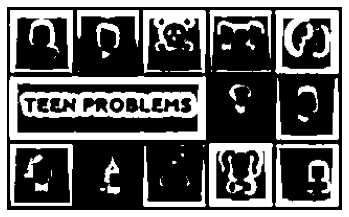

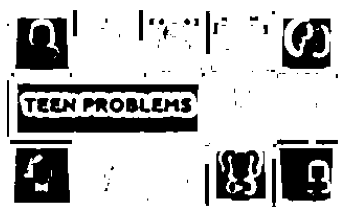

text: ig 1 lene mC)
(eexprostens '




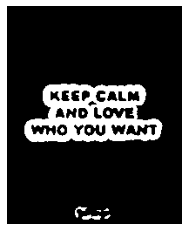

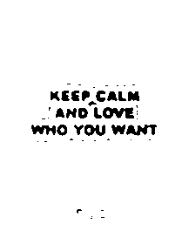

text: KEEPCALM
"AND LOVE!
WHO YOU WANT




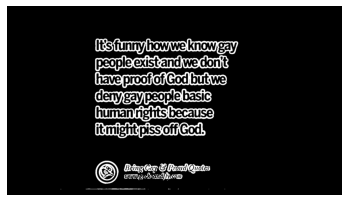

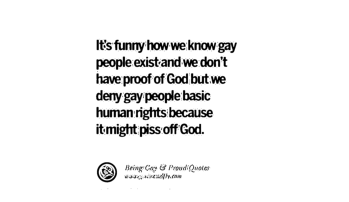

text: people :exist‘and we:don'’t
have proof of God but we
deny gay'people basic
human rights'because
it'might piss: off'God.

& Being: Gay & Proud!Quotes
hetete eneae] ly.com



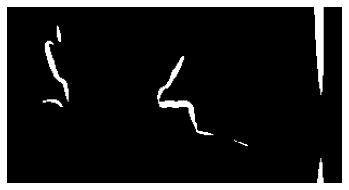

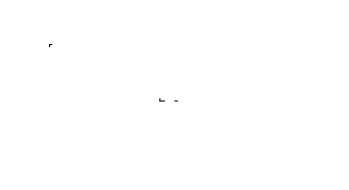

text: 


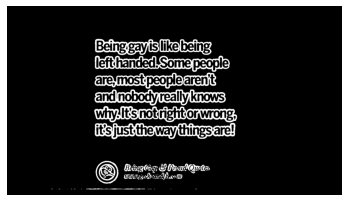

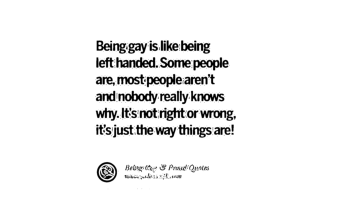

text: Beinggay is like: being
left:handed. Some people
are, most:peopleiaren't
and'nobody really: knows
why. It's'not:rightor wrong,
it's just:the way things:are!

EQ _ Being: Cee B Proud! Quates

idee oka oT em



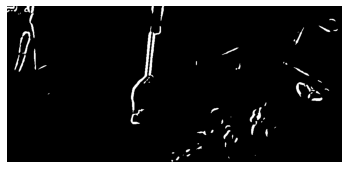

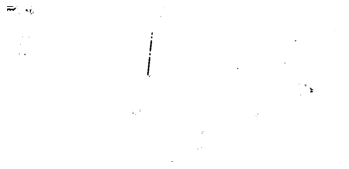

text: 


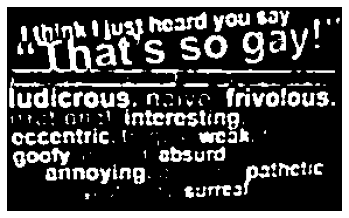

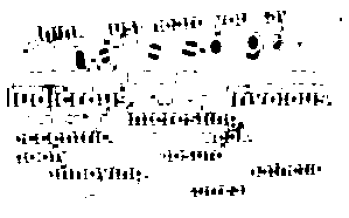

text: a
postr

: aaa
: Pores)



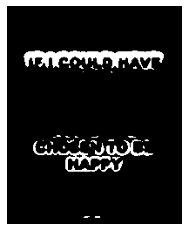

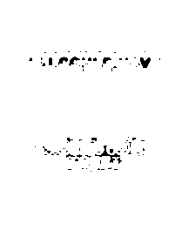

text: 


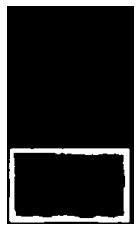

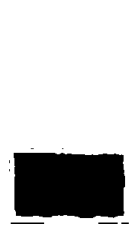

text: 


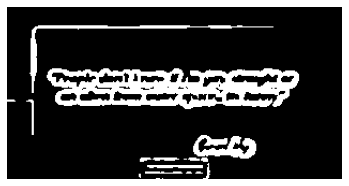

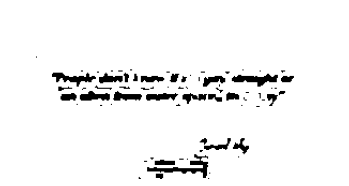

text: 


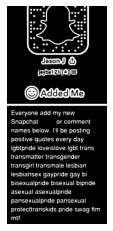

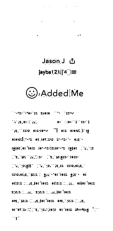

text: JasonJ &
jaybs1 24/471

©,AddedimMe

Tes rer Suele@ Ute rae

Ce ee)

Teleier“ter= re"

Tere eters chwigag 72>



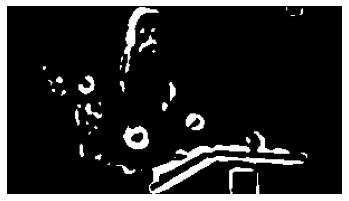

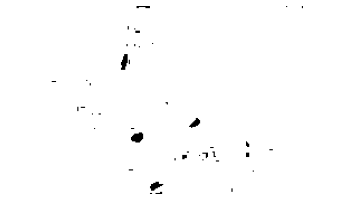

text: 


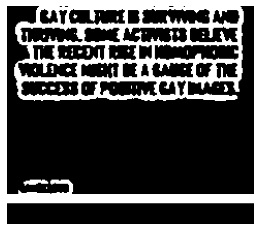

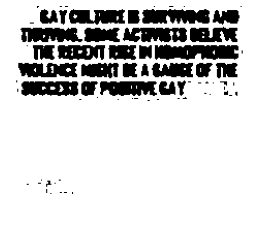

text: 


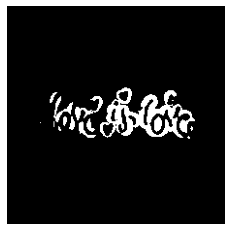

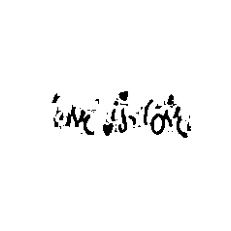

text: 


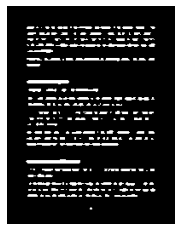

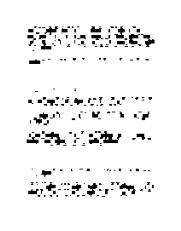

text: 


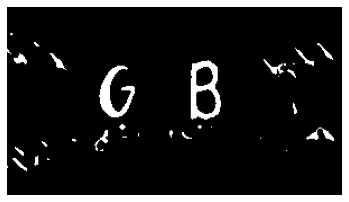

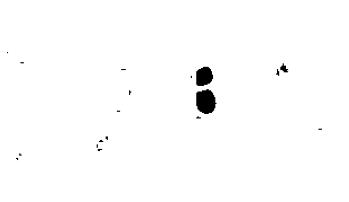

text: «



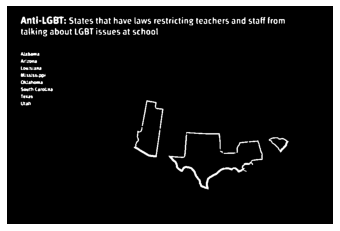

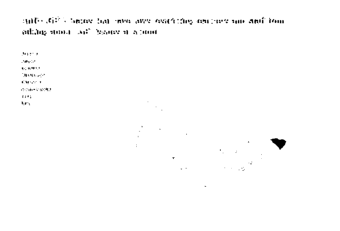

text: RIGS Lal conve ales Gey Garis wane Ae bee

Hts Tho catered




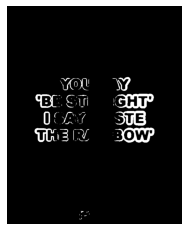

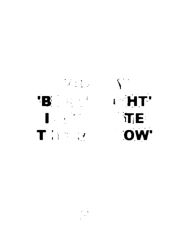

text: 


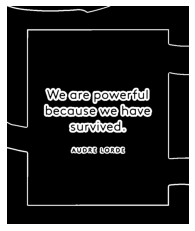

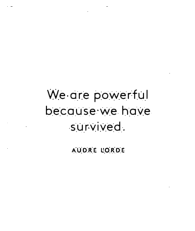

text: We.are powerful
because:we. have
survived.

AUDRE LORDE



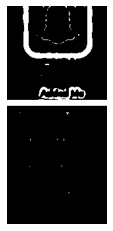

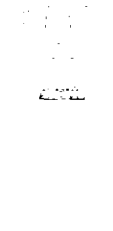

text: 


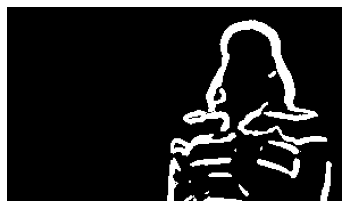

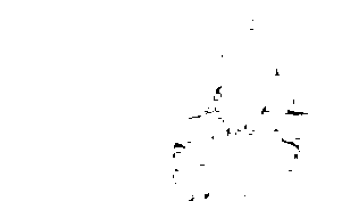

text: 


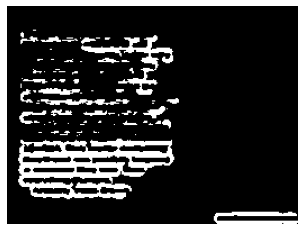

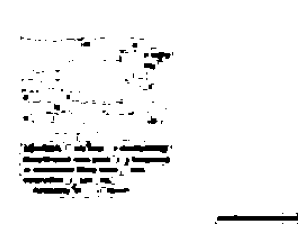

text: 


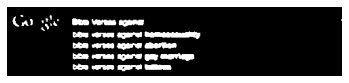

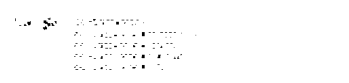

text: 


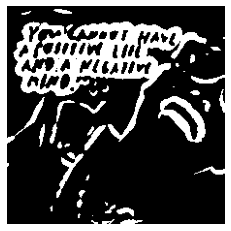

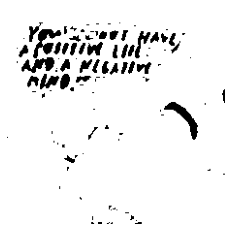

text: Howe WANE”
Ry. ied weeny
AM9.A WL GATIVE
Cd Poe .




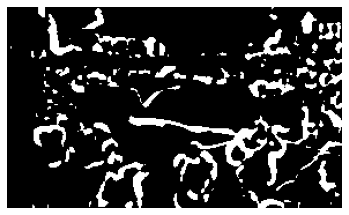

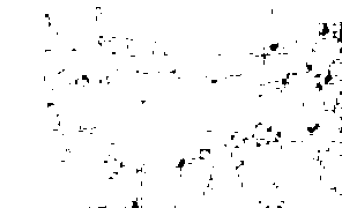

text: 


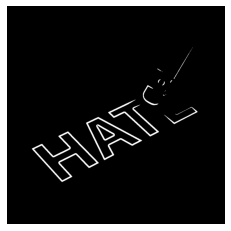

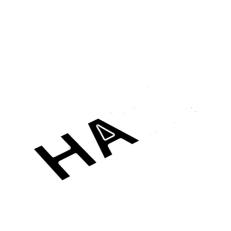

text: 


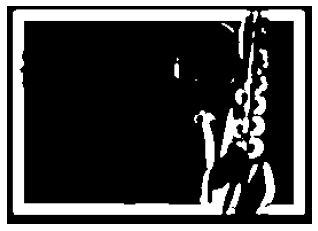

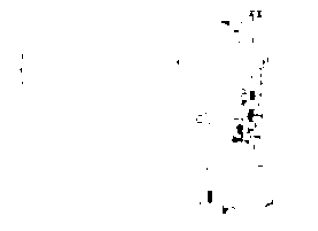

text: 


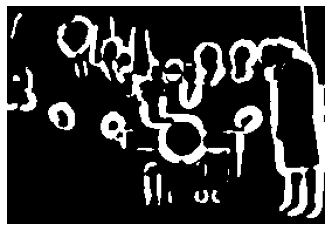

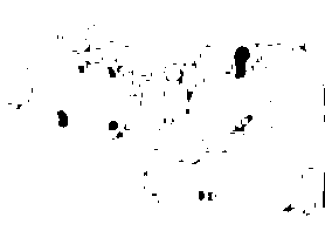

text: 


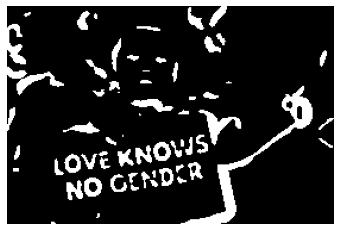

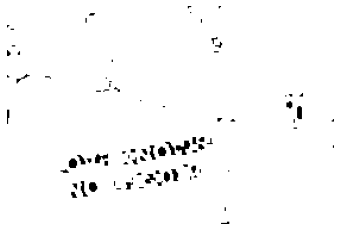

text: 


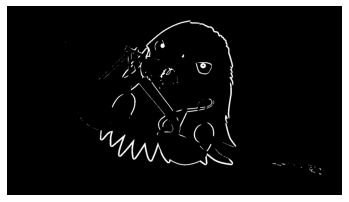

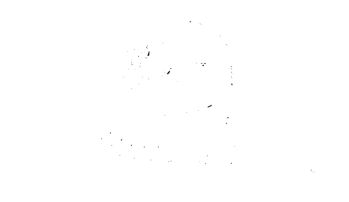

text: 


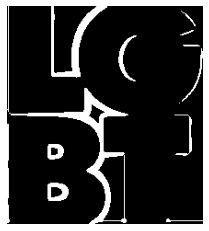

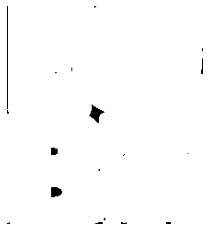

text: 


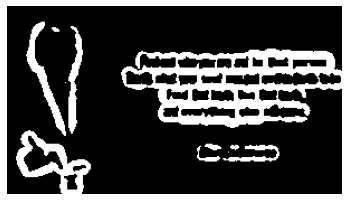

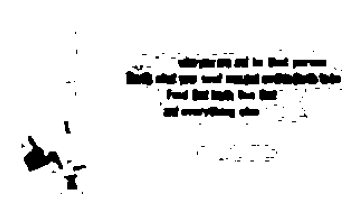

text: 


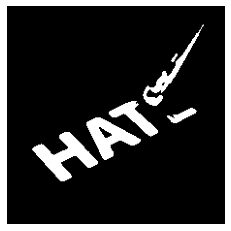

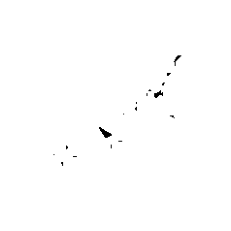

text: 


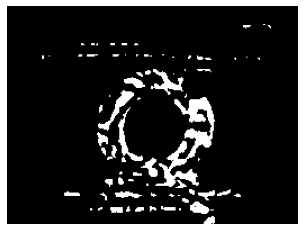

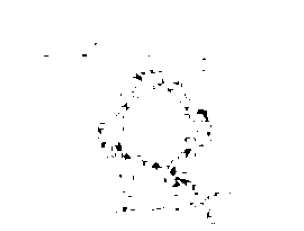

text: 


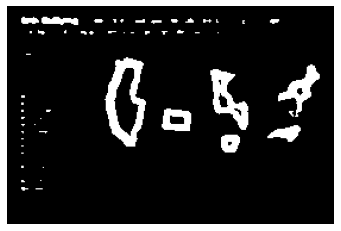

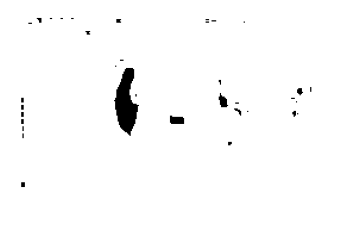

text: 


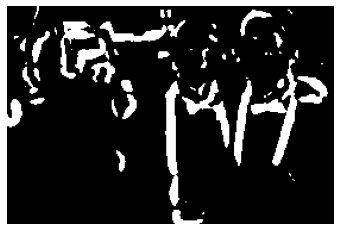

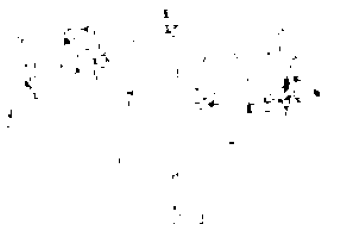

text: 


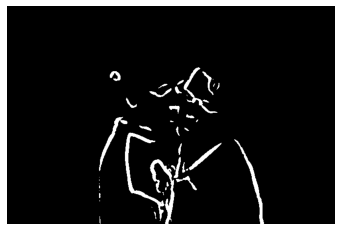

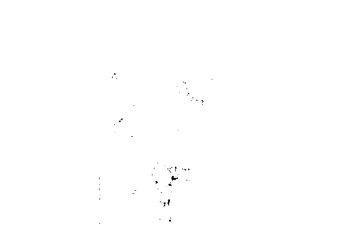

text: 


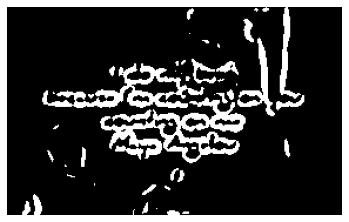

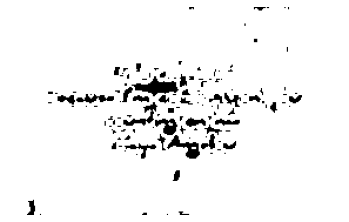

text: 


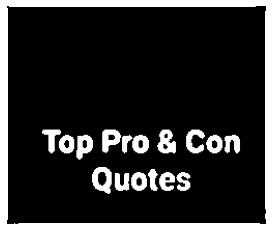

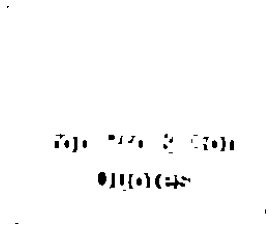

text: Taye 0 Crepe

Ouotes



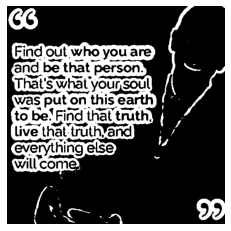

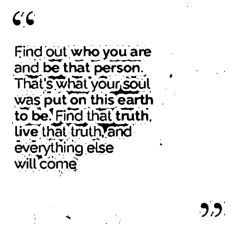

text: CG

Find out who you are
and | bet that'p person.
That'swhat’ your, Soul
was pution thisearth |
to bel Find that truth,
live that ttthYand:
everything else

will’ come



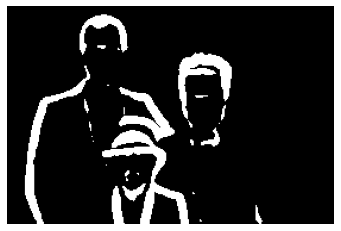

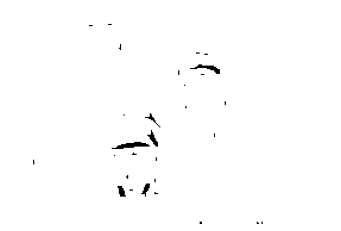

text: 


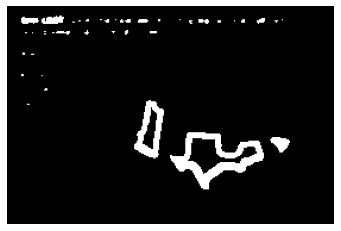

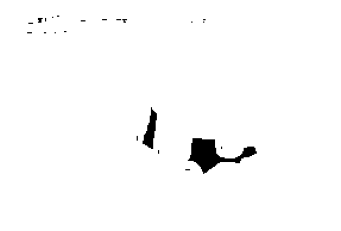

text: 


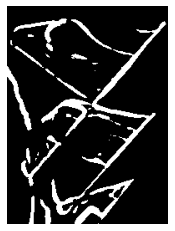

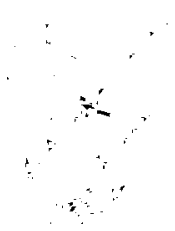

text: 


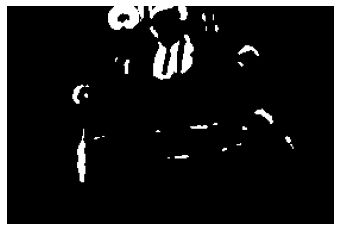

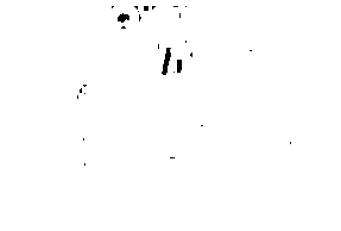

text: he



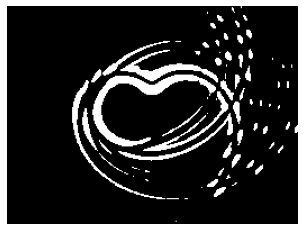

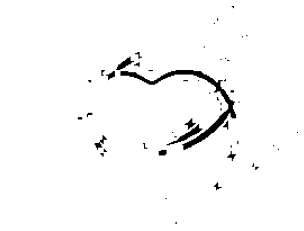

text: 


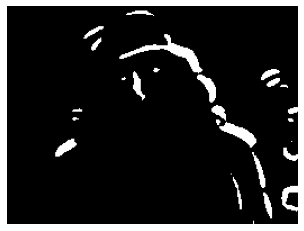

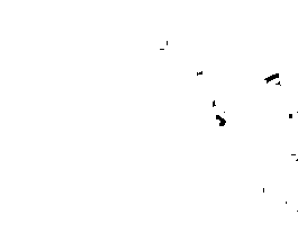

text: 


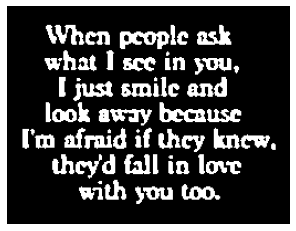

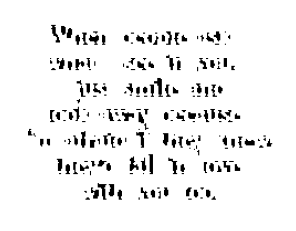

text: Waray cant ot
ah

KRY cette
Spooubete Tres ates
Tere BL te wae

wy ka 6




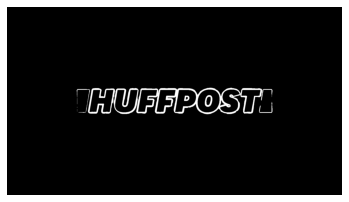

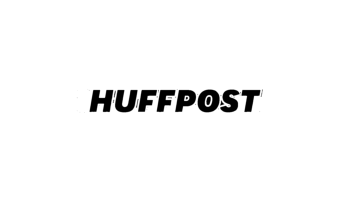

text: HUFFPOST



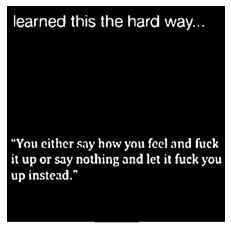

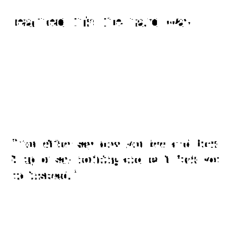

text: 


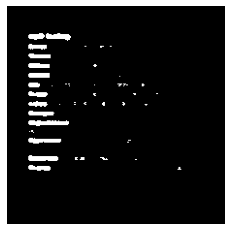

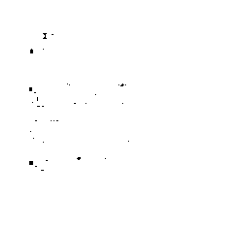

text: 


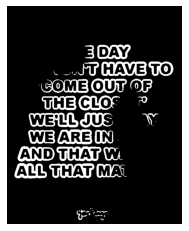

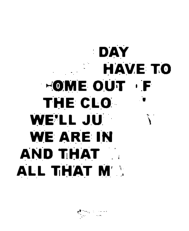

text: : DAY
HAVE TO
~OME OUT F
THECLO. ‘
WE'LL JU > \
WE ARE IN
AND THAT |.
ALL THAT M' :.



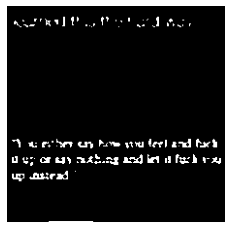

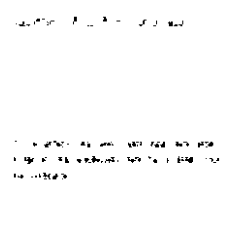

text: eee ene ee
be es



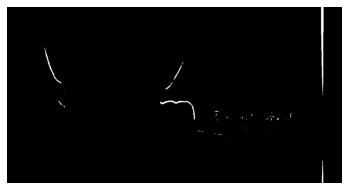

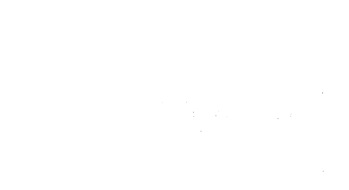

text: 


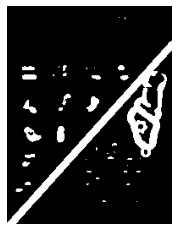

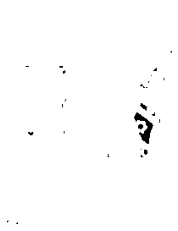

text: 


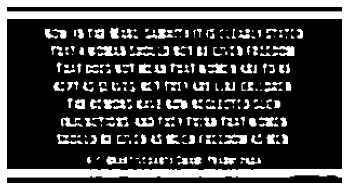

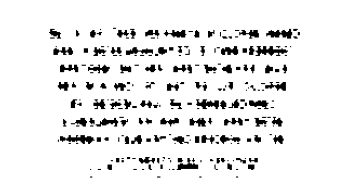

text: 


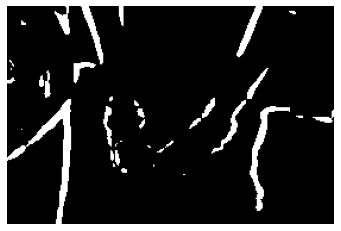

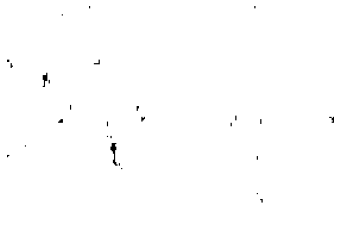

text: 


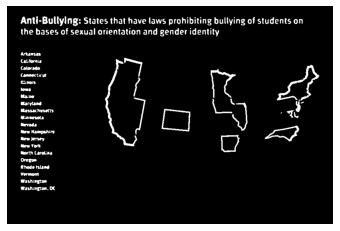

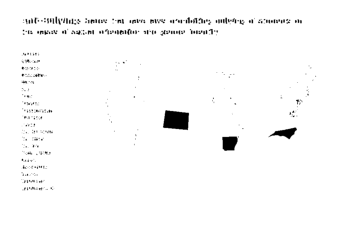

text: SWE ees roan pee aidan atts on

BE eiengitor oie eet te!

OT tn OT}

238

Pie ones



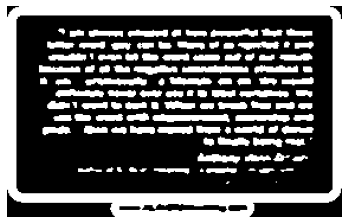

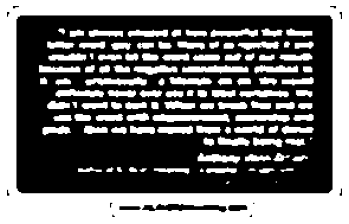

text: 


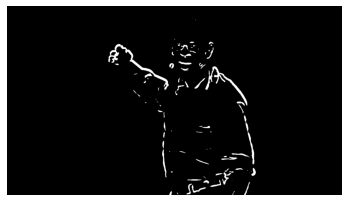

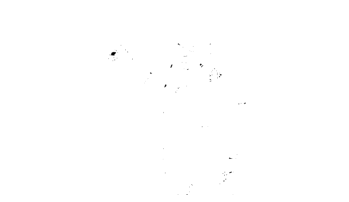

text: 


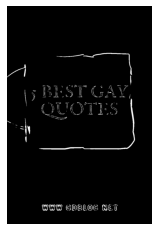

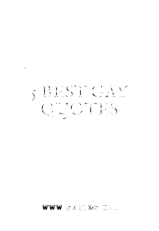

text: 


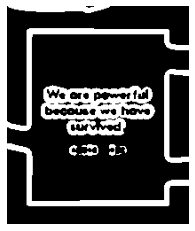

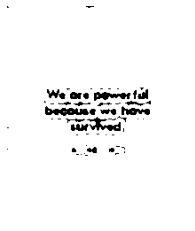

text: 


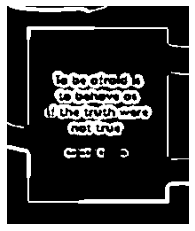

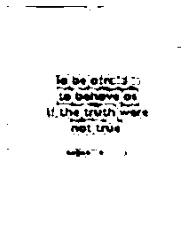

text: 


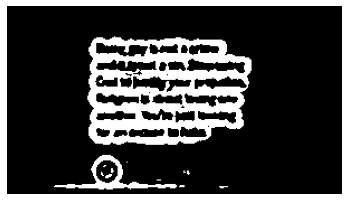

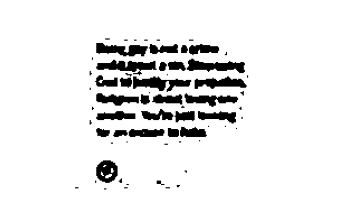

text: 


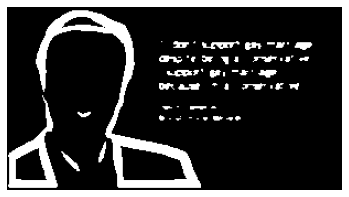

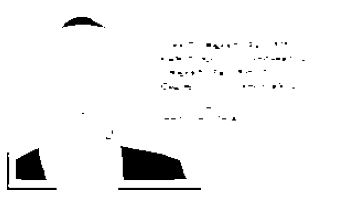

text: 


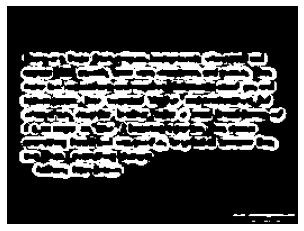

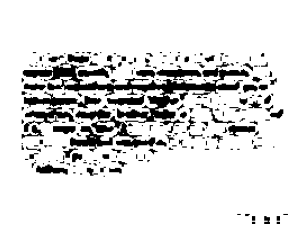

text: 


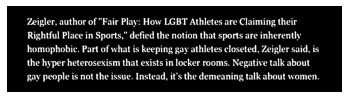

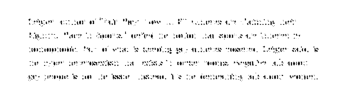

text: 1 . es swt
Maus "Saas




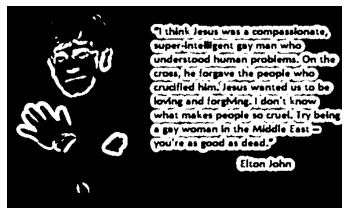

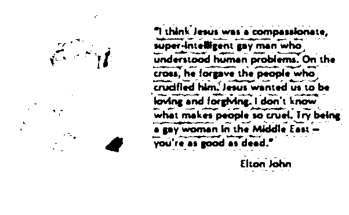

text: superinveliigent ‘Bey man who,
Understood homen problems, On the
cross, he forgave the people who,
Gucitled | him. ese w wanted us ta be
boving anc ‘and d forging! don't don't know
whet makes people s0 cruel. Iry being
‘py women In the Middle. Fest =

ees good es deed.”
Elton Jobn




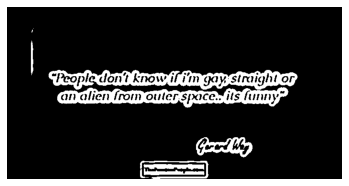

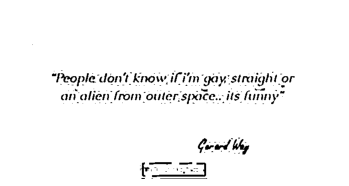

text: “People ‘don't Know: iCi'm ‘gay: straightor
an alien from outer’spate.. its. funny”




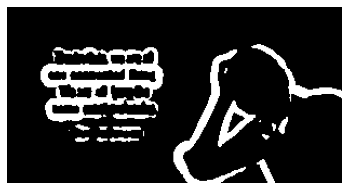

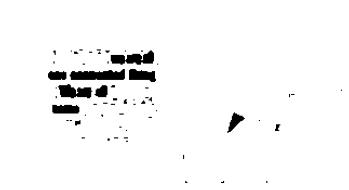

text: 


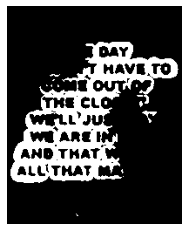

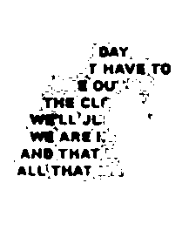

text: 


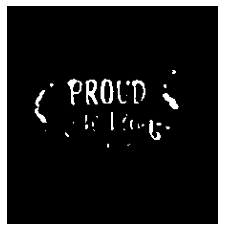

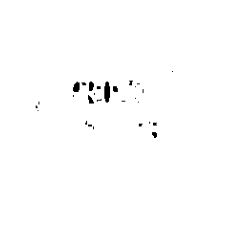

text: 


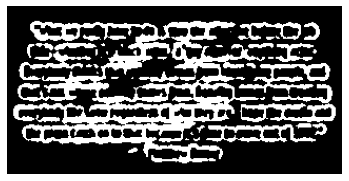

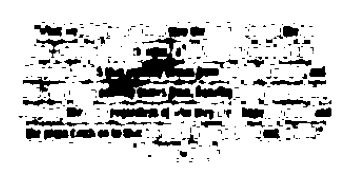

text: 


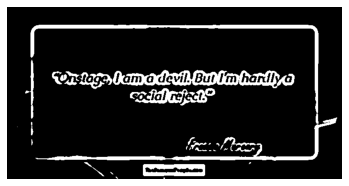

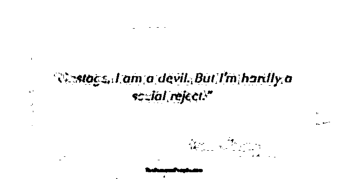

text: “irstecs,am;a devil. But mjharily.a
sozlal reject”

BY




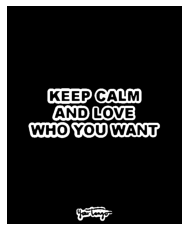

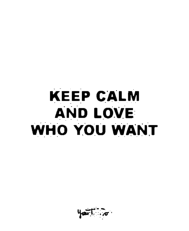

text: KEEP CALM
AND LOVE ©
WHO YOU WANT

Yort ae .



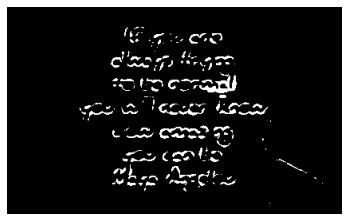

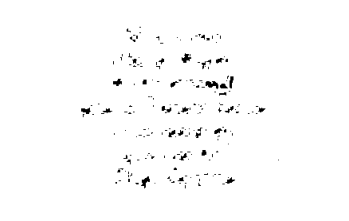

text: 


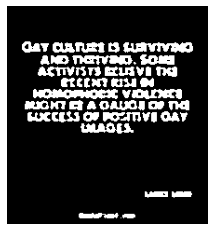

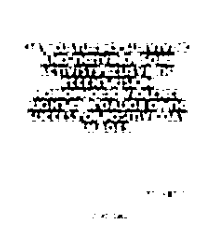

text: 


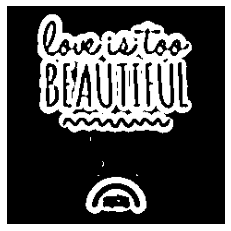

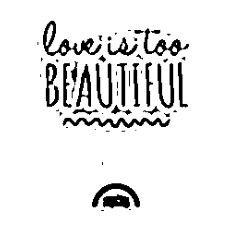

text: Coueicas
SEAUTTINL

aad

tae
IN
fe



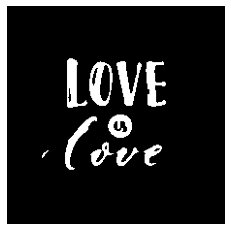

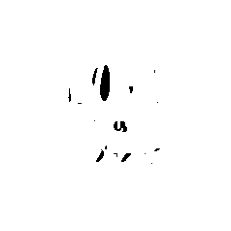

text: 


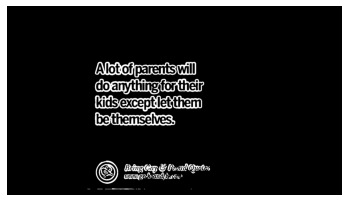

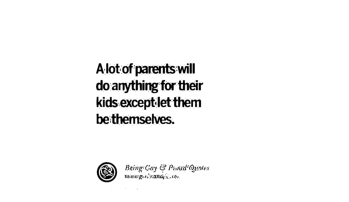

text: Alot of parents.will
do:anything for their
kids.exceptilet them

Being: Gay & Pivitd' Quotes
tered Let CONG. Cee.



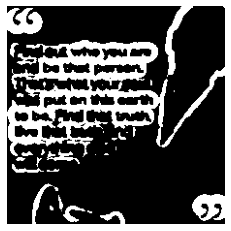

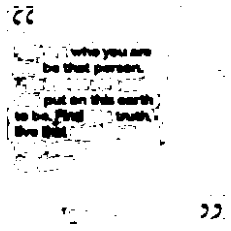

text: 22



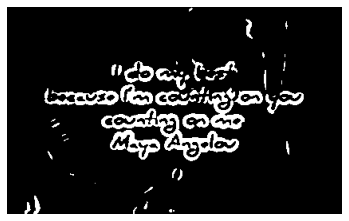

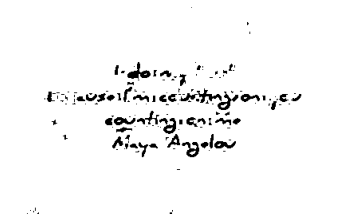

text: + dayatiggren re

Blags Argelow



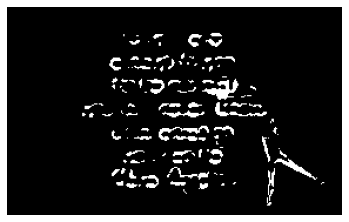

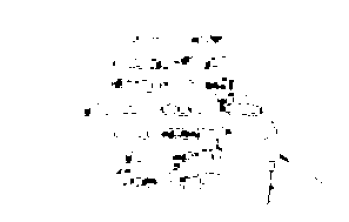

text: 


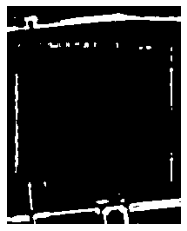

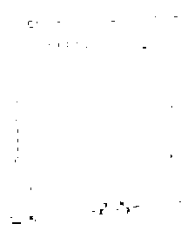

text: 


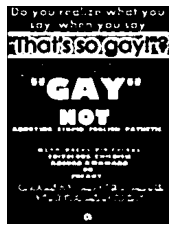

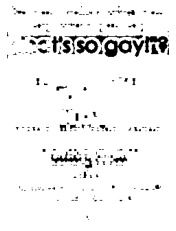

text: | SEHSTSOTQGYI




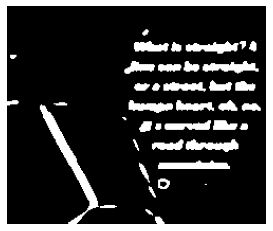

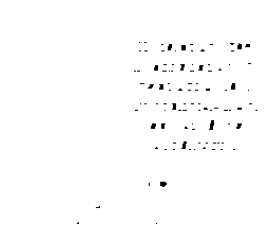

text: 


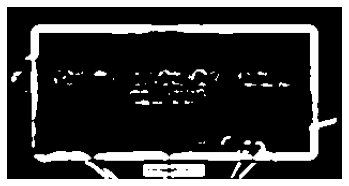

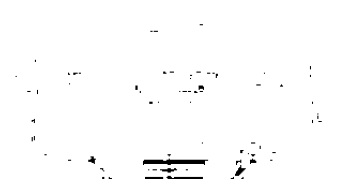

text: 


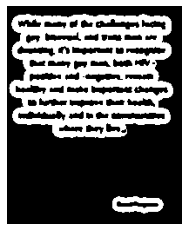

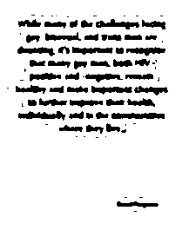

text: 


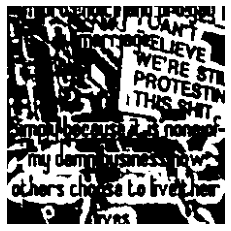

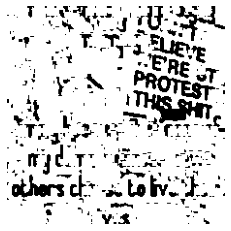

text: 


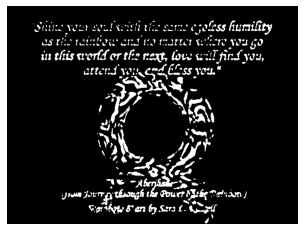

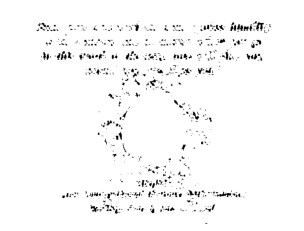

text: wlcl aie

%.




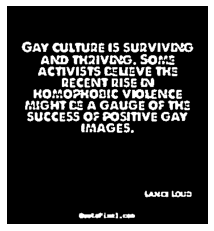

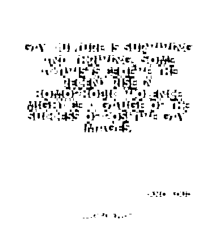

text: welt



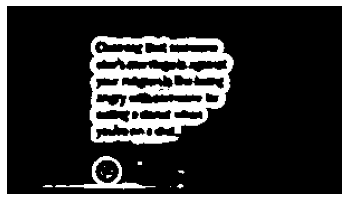

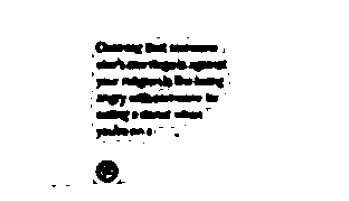

text: 


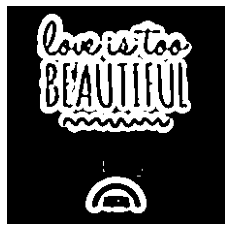

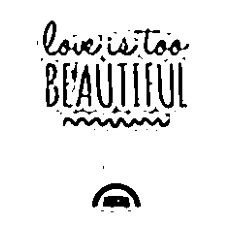

text: Qoieiiaitos-
sn

fe



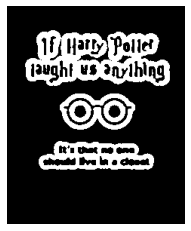

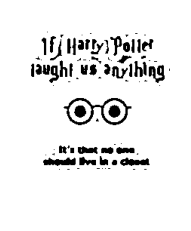

text: 1 Hatty}Pattet
aut us anyihing:



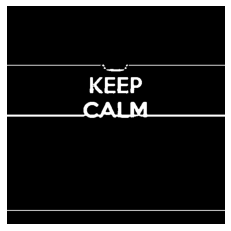

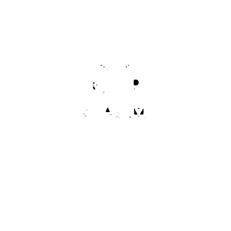

text: Ad



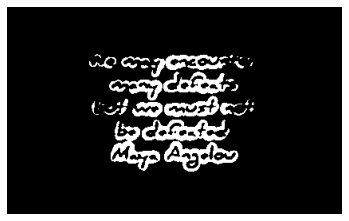

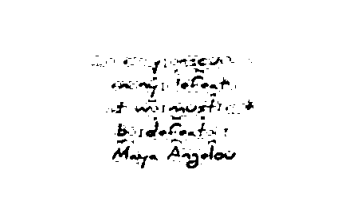

text: fF wrest.
Bordeloats 1
Marya Angelou



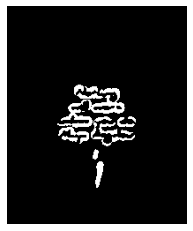

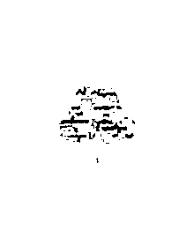

text: 


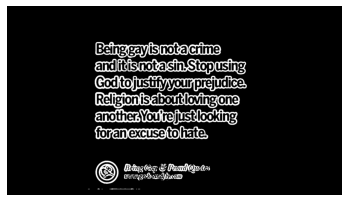

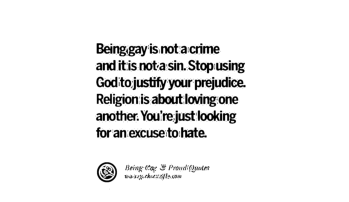

text: Beingigay'isinota:crime

and itis not:a:sin. Stopusing
God ito justify your prejudice.
Religion:is about‘loving:one
another. You're just looking
for'an‘excuse'to:hate.

e& Being Caz & Proud!Quotes
teaeeseethecaz] be: com



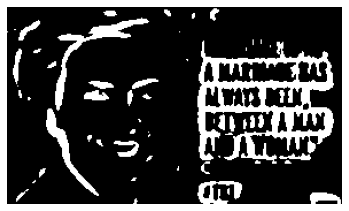

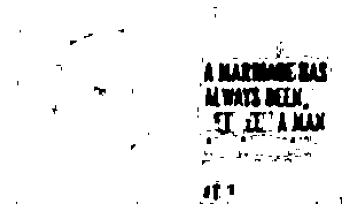

text: 


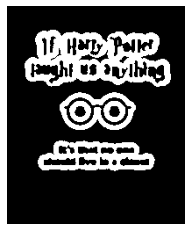

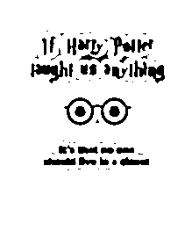

text: 


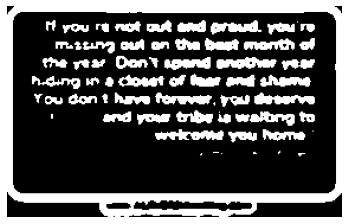

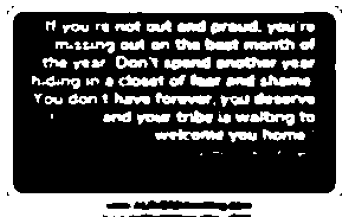

text: Hf you ra not out end graud. you're

misting out on tha hast month of
the year Don't spend enother reer
hiding in a closet of lear and shame
You dont have forever, yas deserve

+ and yous tribe is wating to
welcome you hore




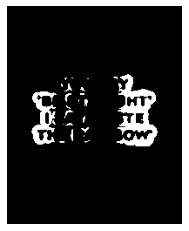

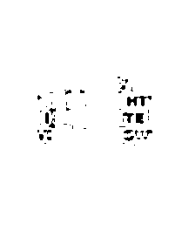

text: 


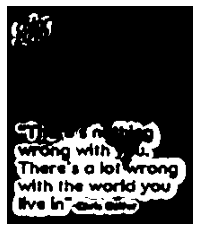

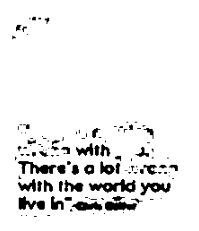

text: co




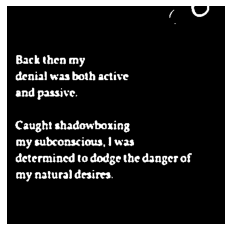

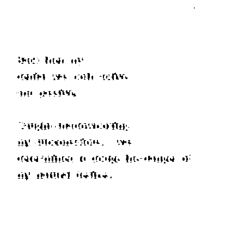

text: Dee Mtge ett

eCTRE DEL +

PLS

Vet ewes

Ue Trent

ETH:

wee

POR CLC)

Hy Pel ethos,



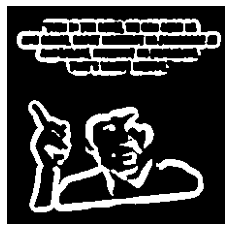

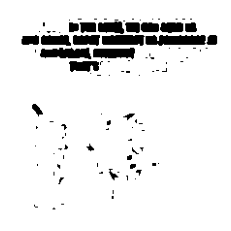

text: 


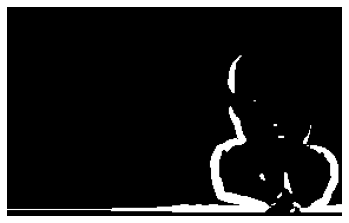

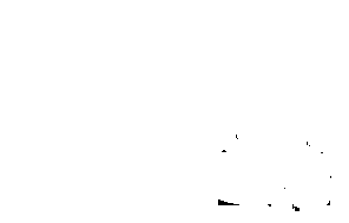

text: 


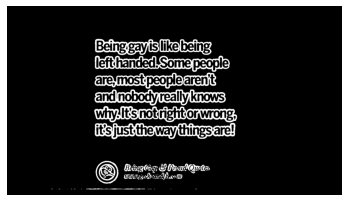

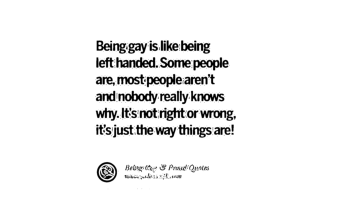

text: Beinggay is like: being
left:handed. Some people
are, most:peopleiaren't
and'nobody really: knows
why. It's'not:rightor wrong,
it's just:the way things:are!

EQ _ Being: Cee B Proud! Quates

idee oka oT em



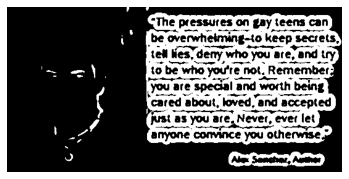

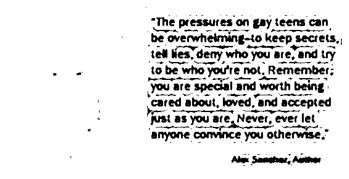

text: “The pressures 0 on any tee teens can can,
ibe overwhelning 10 keep secre secrets,
‘tem Wes "deny who you aievand uy
‘18 be who yc you's fe hot, Remember;
you are special an and we worth bet y .
‘cared ‘about, toved, “and ‘bocepted
‘Wat as you are, Never, ever let’
‘anyone. convince you otherwise.”

Ale: Sanches, Author



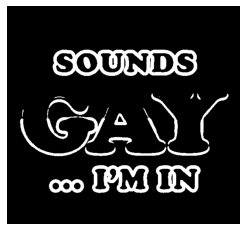

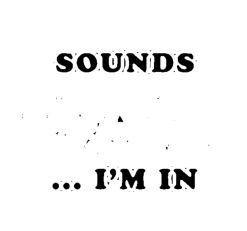

text: SOUNDS

eee VM IN



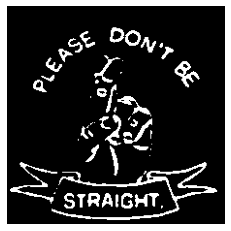

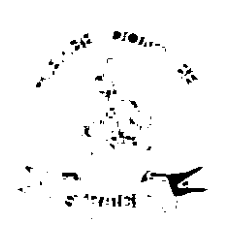

text: 


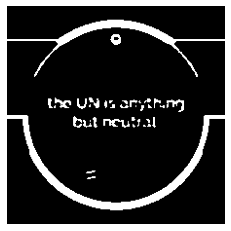

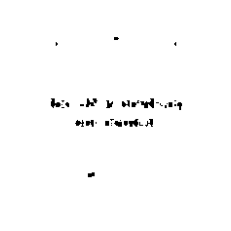

text: 


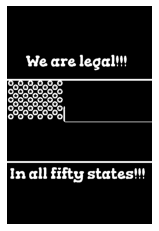

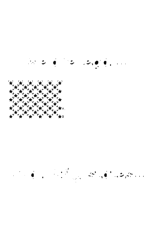

text: NCAR AR 2
tee

a
ate
K

*®

we!

a
aes re
Posies

tp
cao
tp
?

“et mK .
ie te ae

e

~
ty
~
",

at

+

K
te

y
a
cr
el
*

+

a,

te

th



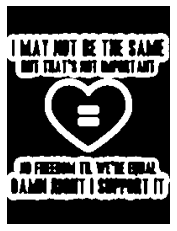

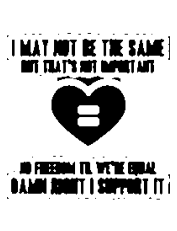

text: 


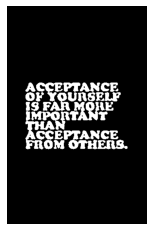

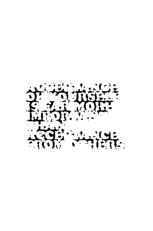

text: 


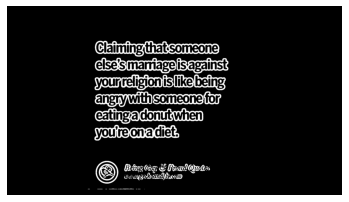

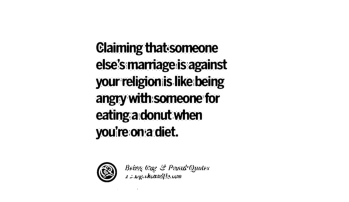

text: Claiming thatsomeone
else’simarriageis:against
your religioniis like:being
angry with:someone for
eating:a.donut:when
youire:on‘a diet.

Qa Being Cas S Proud’ Quotes
£ ctegeckvane] com



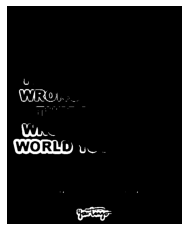

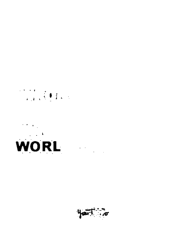

text: yar



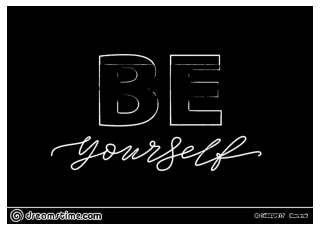

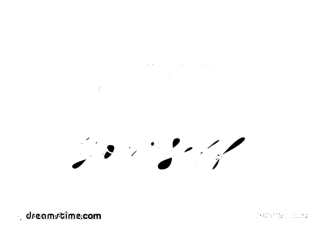

text: » dreamscimecom



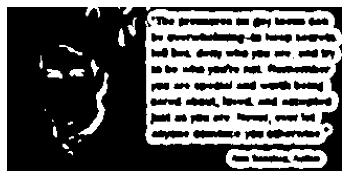

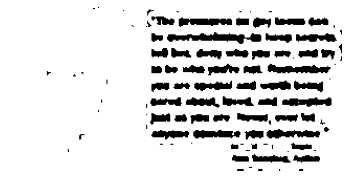

text: {Tee promneren tn goy toes eon,
be wrerotetmnng-ts berep taerotn.
tal Dee dey wt you wn, sae By




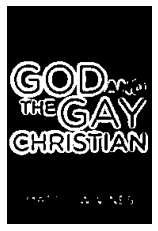

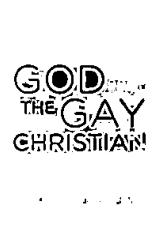

text: GHRISTIATS!



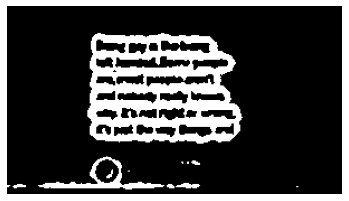

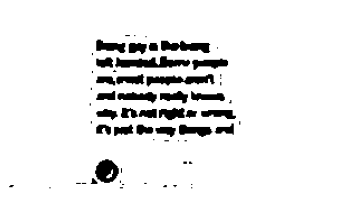

text: 


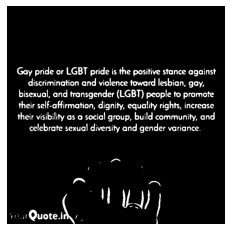

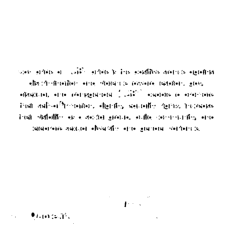

text: vate tere a) ar4iite bite confide aie eetel-

iatde [opdeitei-, eleby,

OS ae eo OC UOME a CMO LCR RCH.
oUCFel, ol te aor egetd-tetd | oi ecagelolta te o1ée]--t0bts
Prat tale tonite, shige tty set teill-s eh, Pe iiente
Tad AON ok 6 Ser tted sitelde, ot Me oii tiey, otto

Tddeleiie sted ehecaal> ebte etacterd vel telt ce




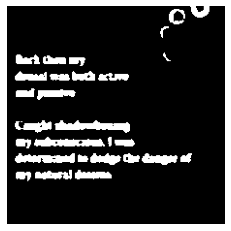

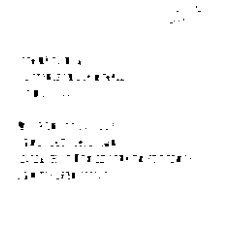

text: 


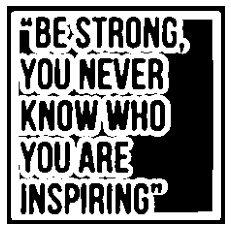

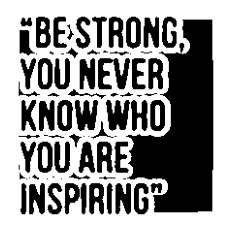

text: 


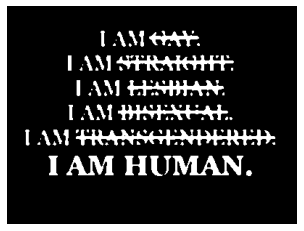

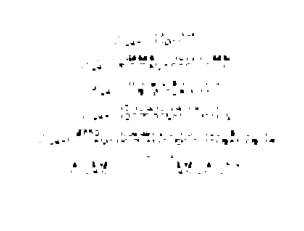

text: 


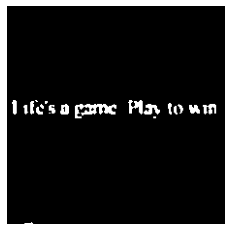

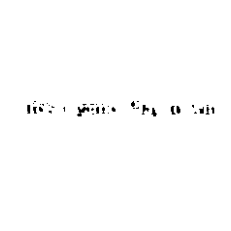

text: 1 gti Em, Oca



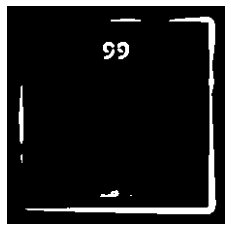

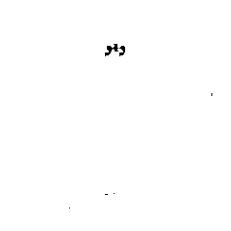

text: card



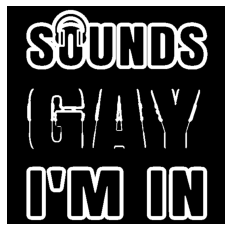

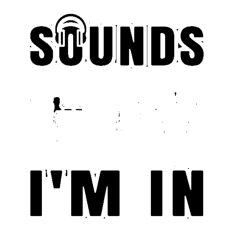

text: i'M I N



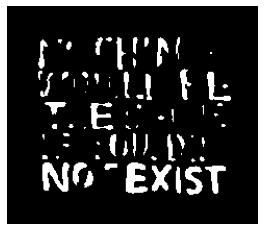

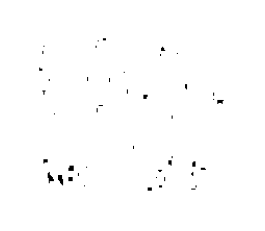

text: 


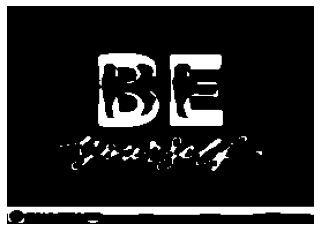

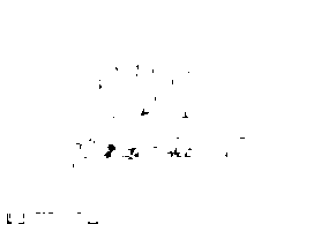

text: 


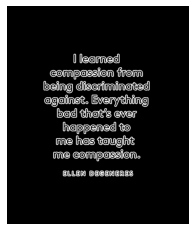

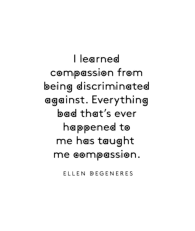

text: | learned
compassion from
being discriminated
against. Everything
bad that’s ever
happened to
me has taught
me Compassion.

ELLEN DEGENERES



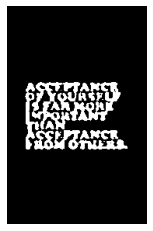

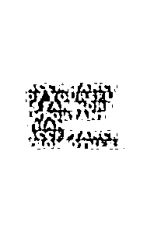

text: a nila
a



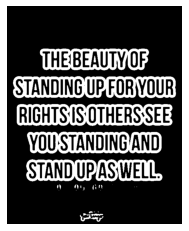

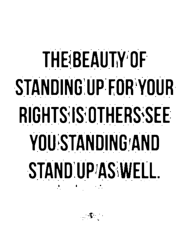

text: THE:BEAUTY OF
STANDING UP:FOR'YOUR
RIGHTS‘IS‘OTHERS‘SEE

YOU:STANDING:AND
STAND UP'ASWELL.

ome: ‘



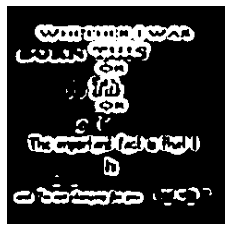

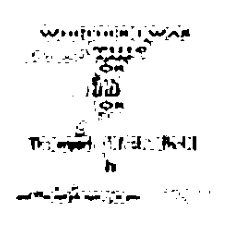

text: 


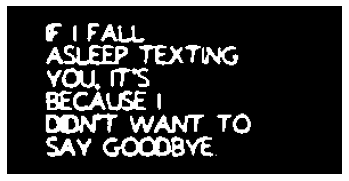

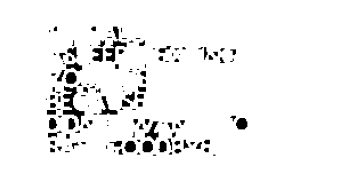

text: 


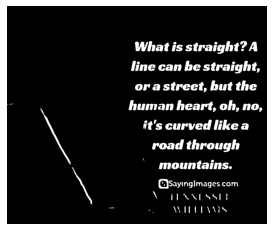

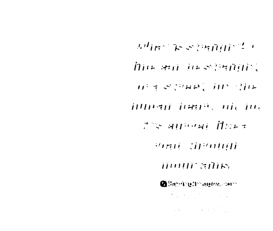

text: Fite otepp tie wast
i ne cer 2 i

LT LTT ct eee

Mo aipeeragé P]oce

reed SOE
Pedi AiR

@:

~

fit,



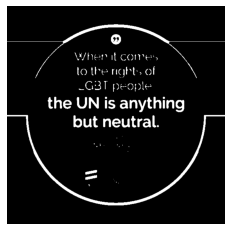

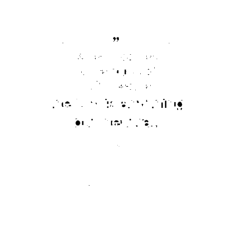

text: ”




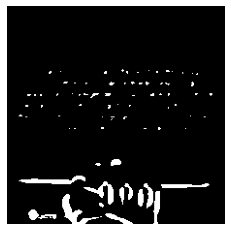

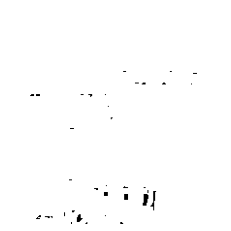

text: 


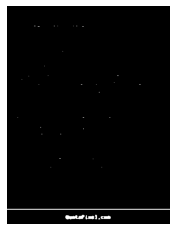

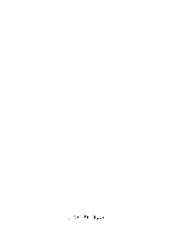

text: 


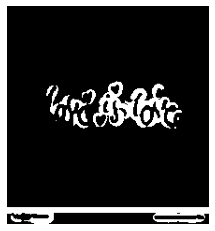

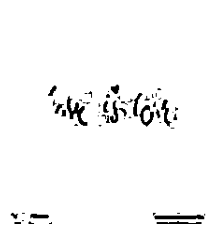

text: ra eG:



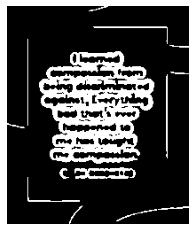

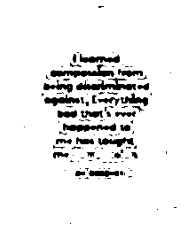

text: 


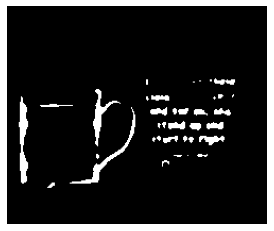

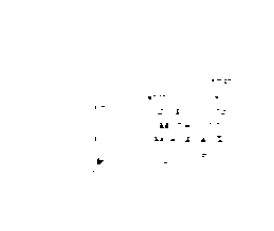

text: 


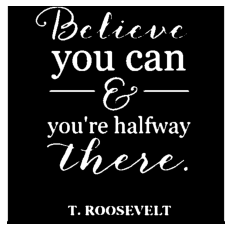

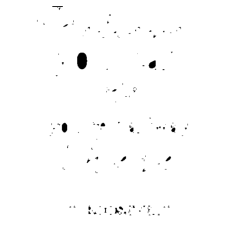

text: 


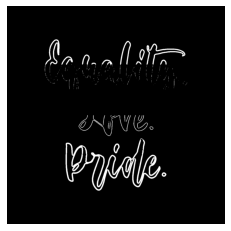

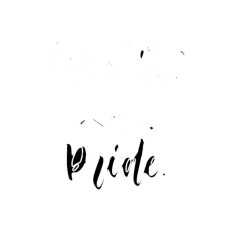

text: Vv pide |



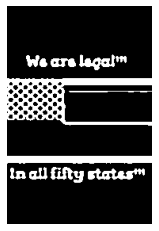

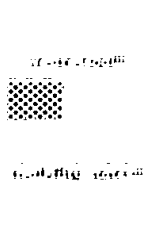

text: sth er




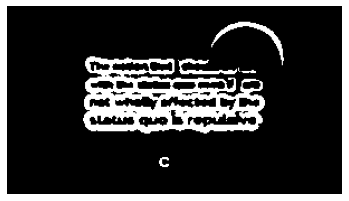

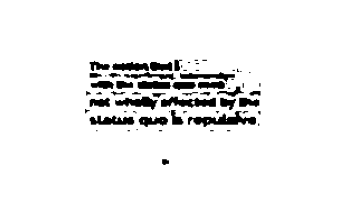

text: 


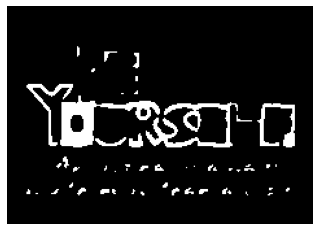

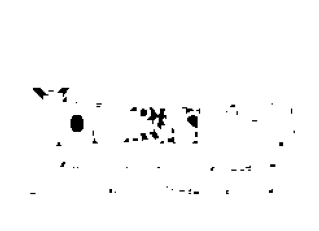

text: 


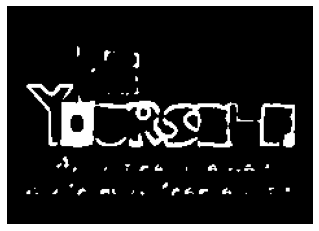

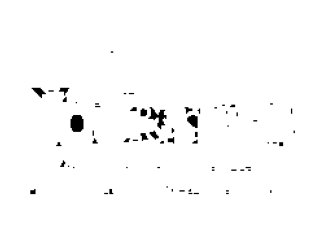

text: 


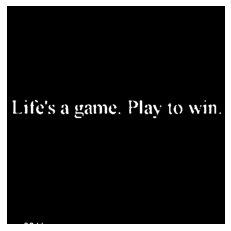

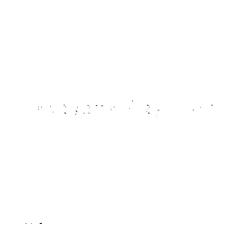

text: 


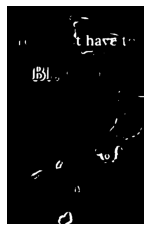

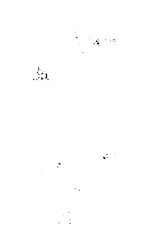

text: 


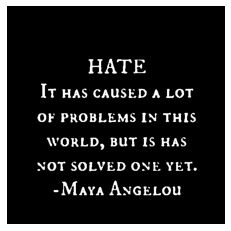

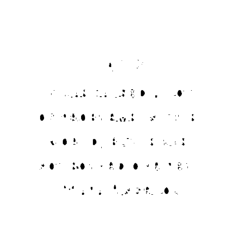

text: : ; . eo
o
‘ “4 °
"s PI " ry

"ed a

‘ - 8 oe
“. © Cy .
- 8 > @

o *,



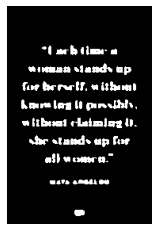

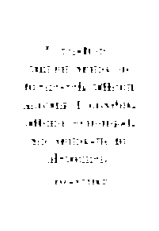

text: 


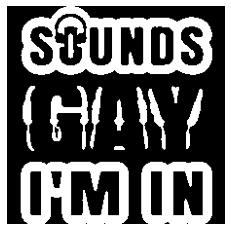

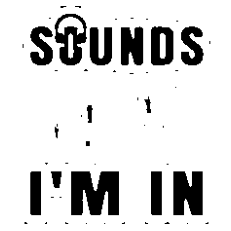

text: S@UNDS

t 1

'
I'M IN



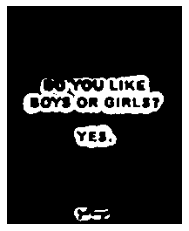

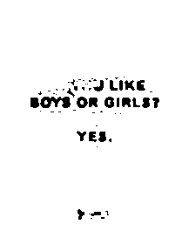

text: ‘OR GIRLS?

YES.



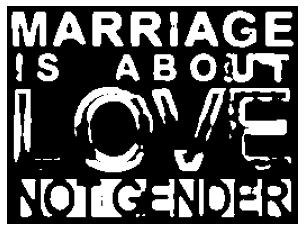

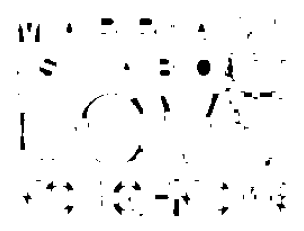

text: 


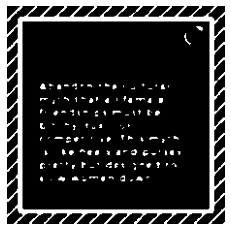

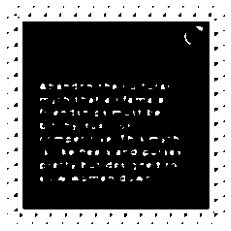

text: 


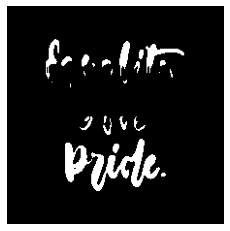

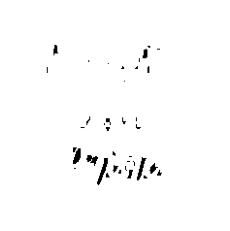

text: 


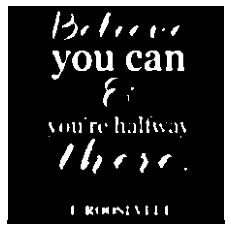

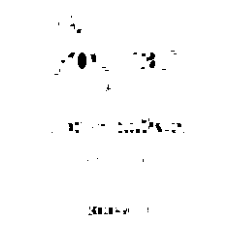

text: 


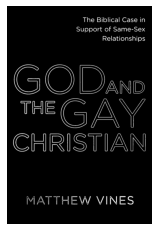

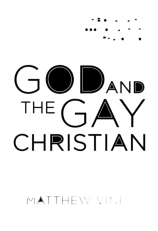

text: COD»
mEGAY

CHRISTIAN

MATTHEW VIP



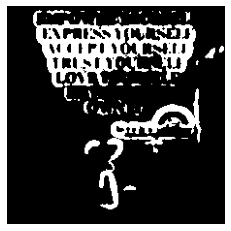

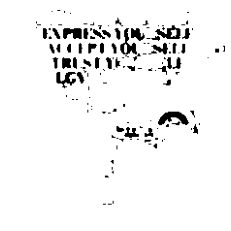

text: a
ver
Yaestare mo.




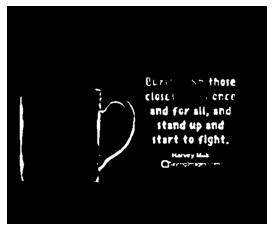

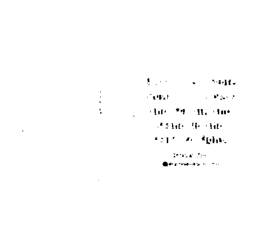

text: 


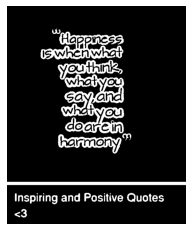

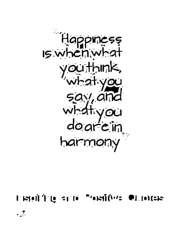

text: “Happiness

Is ieee what

you think,

“what: ‘you.

sax),ana
doareiin,
harmony ”

Passel Tle tute “enii(ivs @1.1entzie



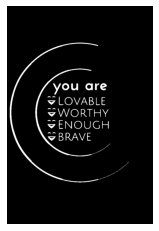

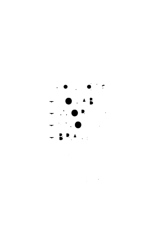

text: 


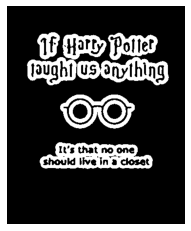

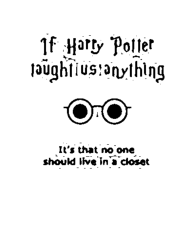

text: Tf. Harty ‘Pollet
laughiivs:anything

@®

It’s that noone,
should live'in’s ‘closet



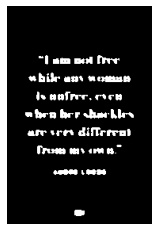

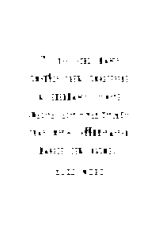

text: 


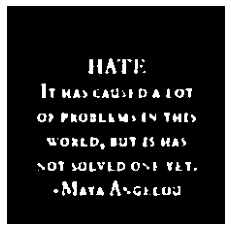

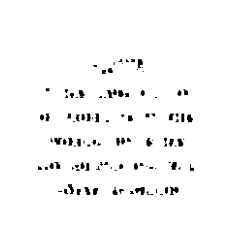

text: ere



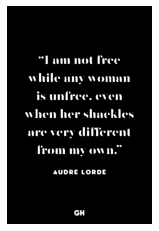

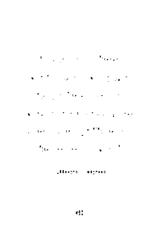

text: 


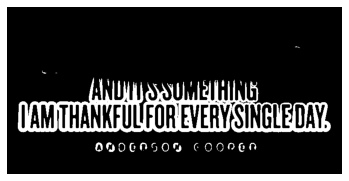

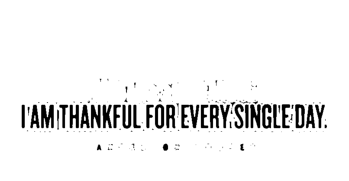

text: |AM THANKFUL FOR'EVERY'SINGLE'DAY



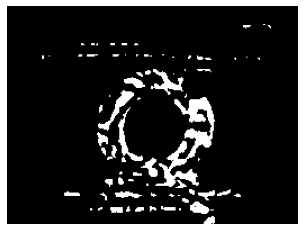

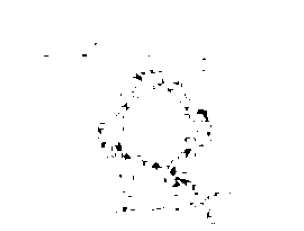

text: 


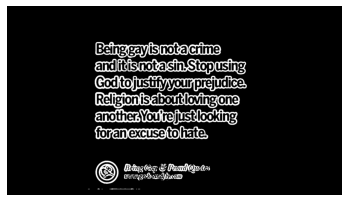

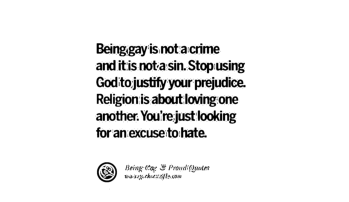

text: Beingigay'isinota:crime

and itis not:a:sin. Stopusing
God ito justify your prejudice.
Religion:is about‘loving:one
another. You're just looking
for'an‘excuse'to:hate.

e& Being Caz & Proud!Quotes
teaeeseethecaz] be: com

Text Extracted from the files in 'archive' folder & saved to list..


In [120]:
import os
ex_txt = []   #list to store the extracted text

#Function to Extract Text
def TxtExtract(directory):
    """
    This function will handle the core OCR processing of images.
    """
    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            # text = pytesseract.image_to_string(Image.open(filepath), timeout=5)
            text = return_text(filepath)
            if not text:
                ex_txt.extend([[file, "blank"]])
            else:   
                ex_txt.extend([[file, text]])
                
    fol_nm = os.path.split(os.path.dirname(subdir))[-1]
    
    print(f"Text Extracted from the files in '{fol_nm}' folder & saved to list..")

directory = r'C:\Users\deise\Desktop\Upwork\archive\Dataset'
TxtExtract(directory)